# LGMVIP-DataScience
# Atishay Jain

# Problem statement: Determining the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.


### DATASET: https://drive.google.com/drive/folders/19vJc8Hy6c0XFeiFnb9KbKr3isLV-PFpk?usp=shari

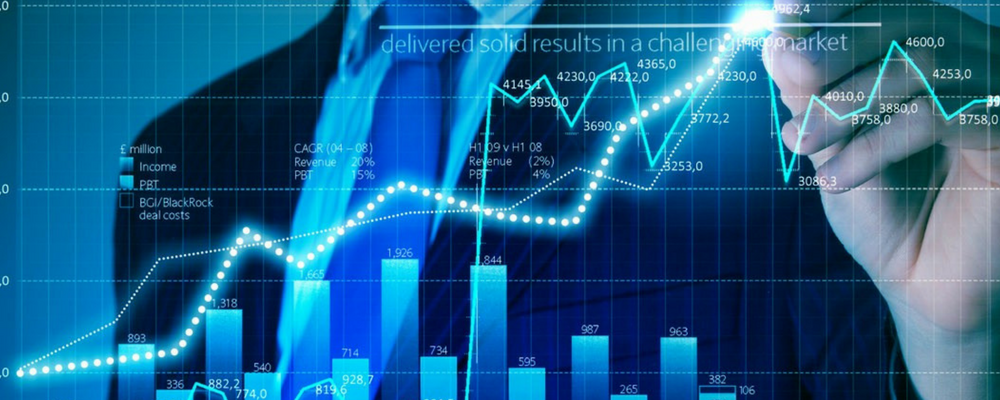

#### Exploratory data analysis of MSFT dataset

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('MSFT.csv')#reading the dataset using pandas

In [3]:
df.head()#Displaying the top 5 data values

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061751  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063956   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065059   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063405    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062302    47894400

In [4]:
df.tail()#Displaying the lower 5 data values

Date        Open        High         Low       Close   Adj Close  \
8852  2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
8853  2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
8854  2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
8855  2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
8856  2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

        Volume  
8852  31014200  
8853  46903100  
8854  40589000  
8855  30929200  
8856  19598900

In [5]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [6]:
df.describe#Description of the dataset

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061751   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063956   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065059   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063405   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.062302   
...          ...         ...         ...         ...         ...         ...   
8852  2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
8853  2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
8854  2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
8855  2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
8856  2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

     

In [7]:
df.duplicated().sum()#Numebr of duplicated values in the dataset

0

In [8]:
df.isnull() #Checking for any null values in the dataset

Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
8852  False  False  False  False  False      False   False
8853  False  False  False  False  False      False   False
8854  False  False  False  False  False      False   False
8855  False  False  False  False  False      False   False
8856  False  False  False  False  False      False   False

[8857 rows x 7 columns]

In [9]:
df.isnull().sum()#Checking for the number of null values in the dataset

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.columns #Columns present in the dataset

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df.shape #(number of rows, number of columns)

(8857, 7)

In [12]:
df.columns=df.columns.str.upper() #Renaming the columns in uppercase

In [13]:
df.head() #displaying top 5 values 

DATE      OPEN      HIGH       LOW     CLOSE  ADJ CLOSE      VOLUME
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061751  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063956   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065059   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063405    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062302    47894400

#### It was observed that the Datatype of DATE column is object, so let us convert it into datetime.

In [14]:
df['DATE']= pd.to_datetime(df['DATE'],format = "%Y-%m-%d") #converting 'DATE' from object to datetime Dtype

In [15]:
df.info()# successfully converted the column to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       8857 non-null   datetime64[ns]
 1   OPEN       8857 non-null   float64       
 2   HIGH       8857 non-null   float64       
 3   LOW        8857 non-null   float64       
 4   CLOSE      8857 non-null   float64       
 5   ADJ CLOSE  8857 non-null   float64       
 6   VOLUME     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [16]:
df #8857 rows × 7 columns in our dataset

DATE        OPEN        HIGH         LOW       CLOSE   ADJ CLOSE  \
0    1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061751   
1    1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063956   
2    1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065059   
3    1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063405   
4    1986-03-19    0.099826    0.100694    0.097222    0.098090    0.062302   
...         ...         ...         ...         ...         ...         ...   
8852 2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
8853 2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
8854 2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
8855 2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
8856 2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

          VOLUME  
0     1031788800  
1      308160000  
2      133171200  
3       67766400  
4       47894400  
...          ...  
8852    31014200  
8853    46903100  
8854    40589000  
8855    30929200  
8856    19598900  

[8857 rows x 7 columns]

#### The following plot shows the change in all the features values wrt time

<AxesSubplot:xlabel='VOLUME', ylabel='DATE'>

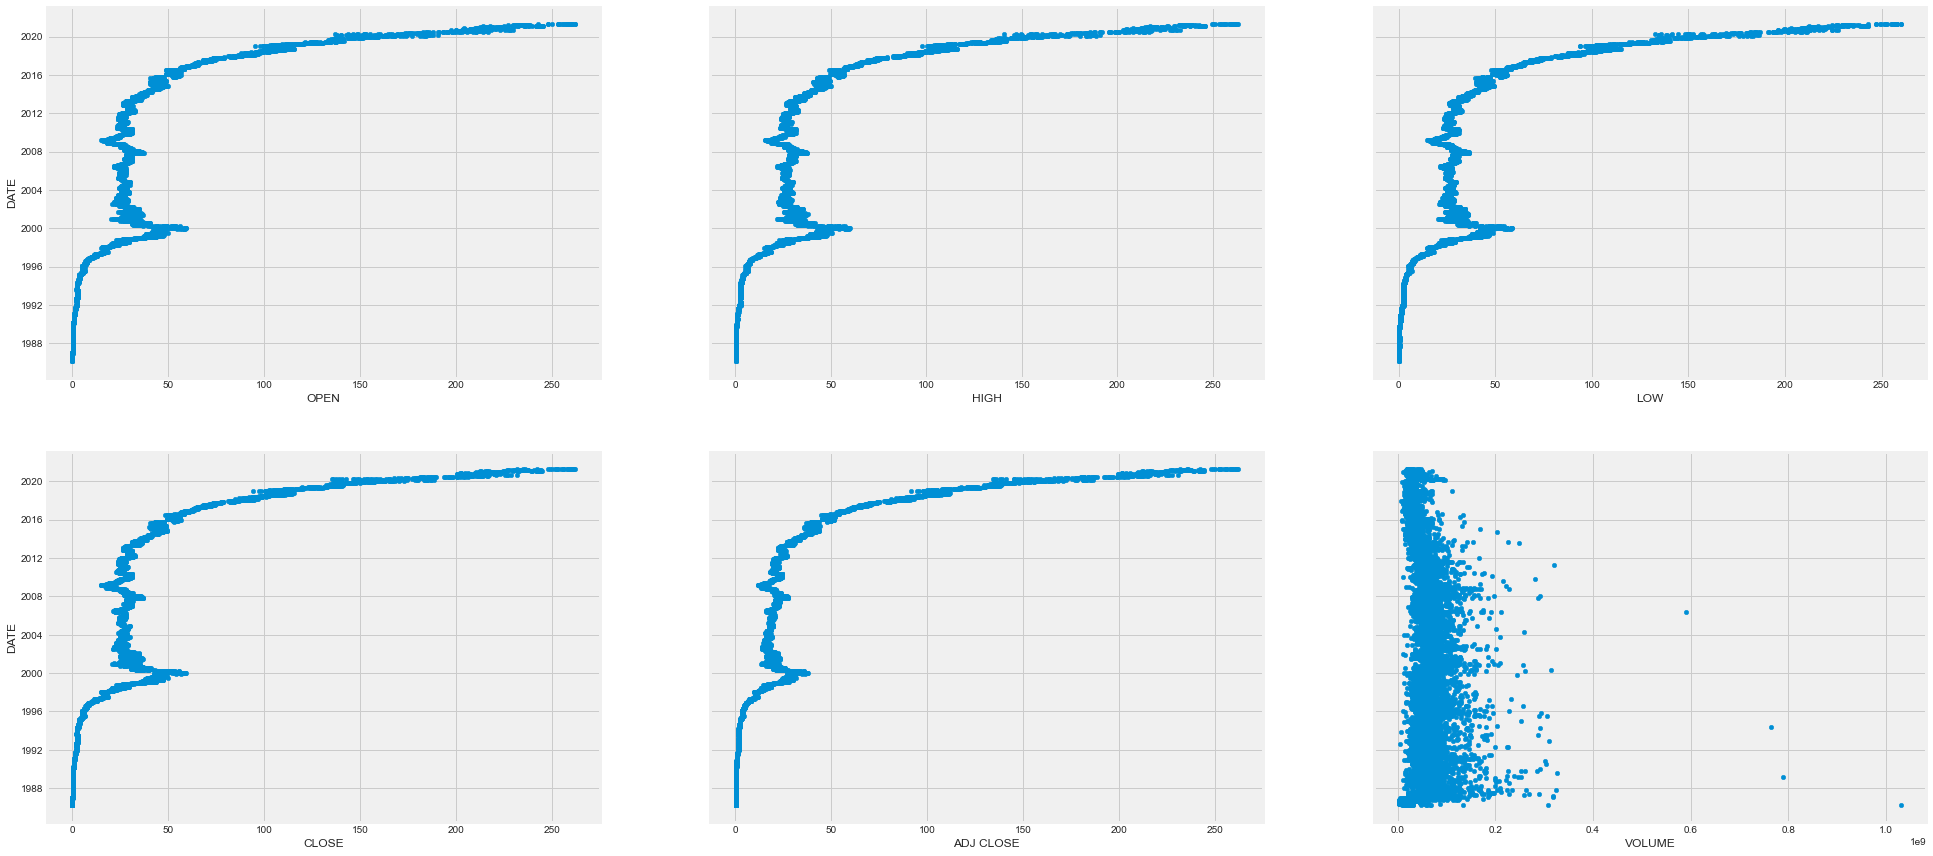

In [17]:
#plotting the scatterplot of all the features with respect to date
fig,axs=plt.subplots(2,3,sharey=True)
df.plot(kind='scatter', x='OPEN', y='DATE', ax=axs[0,0], figsize=(30, 15))
df.plot(kind='scatter', x='HIGH', y='DATE', ax=axs[0,1])
df.plot(kind='scatter', x='LOW', y='DATE', ax=axs[0,2])
df.plot(kind='scatter', x='CLOSE', y='DATE', ax=axs[1,0])
df.plot(kind='scatter', x='ADJ CLOSE', y='DATE', ax=axs[1,1])
df.plot(kind='scatter', x='VOLUME', y='DATE', ax=axs[1,2])

## Insights from the above plots:-
- OPEN, HIGH, LOW, CLOSE and ADJ CLOSE features are showing similar relationship/trend with respect to time.
- The data of the above features is constant till the year 1996, after that, a sudden growth is observed in features with    respect to time.
- The 'VOLUME' feature is mostly distributed between the values 0.0 to 0.4, few outliers are observed.

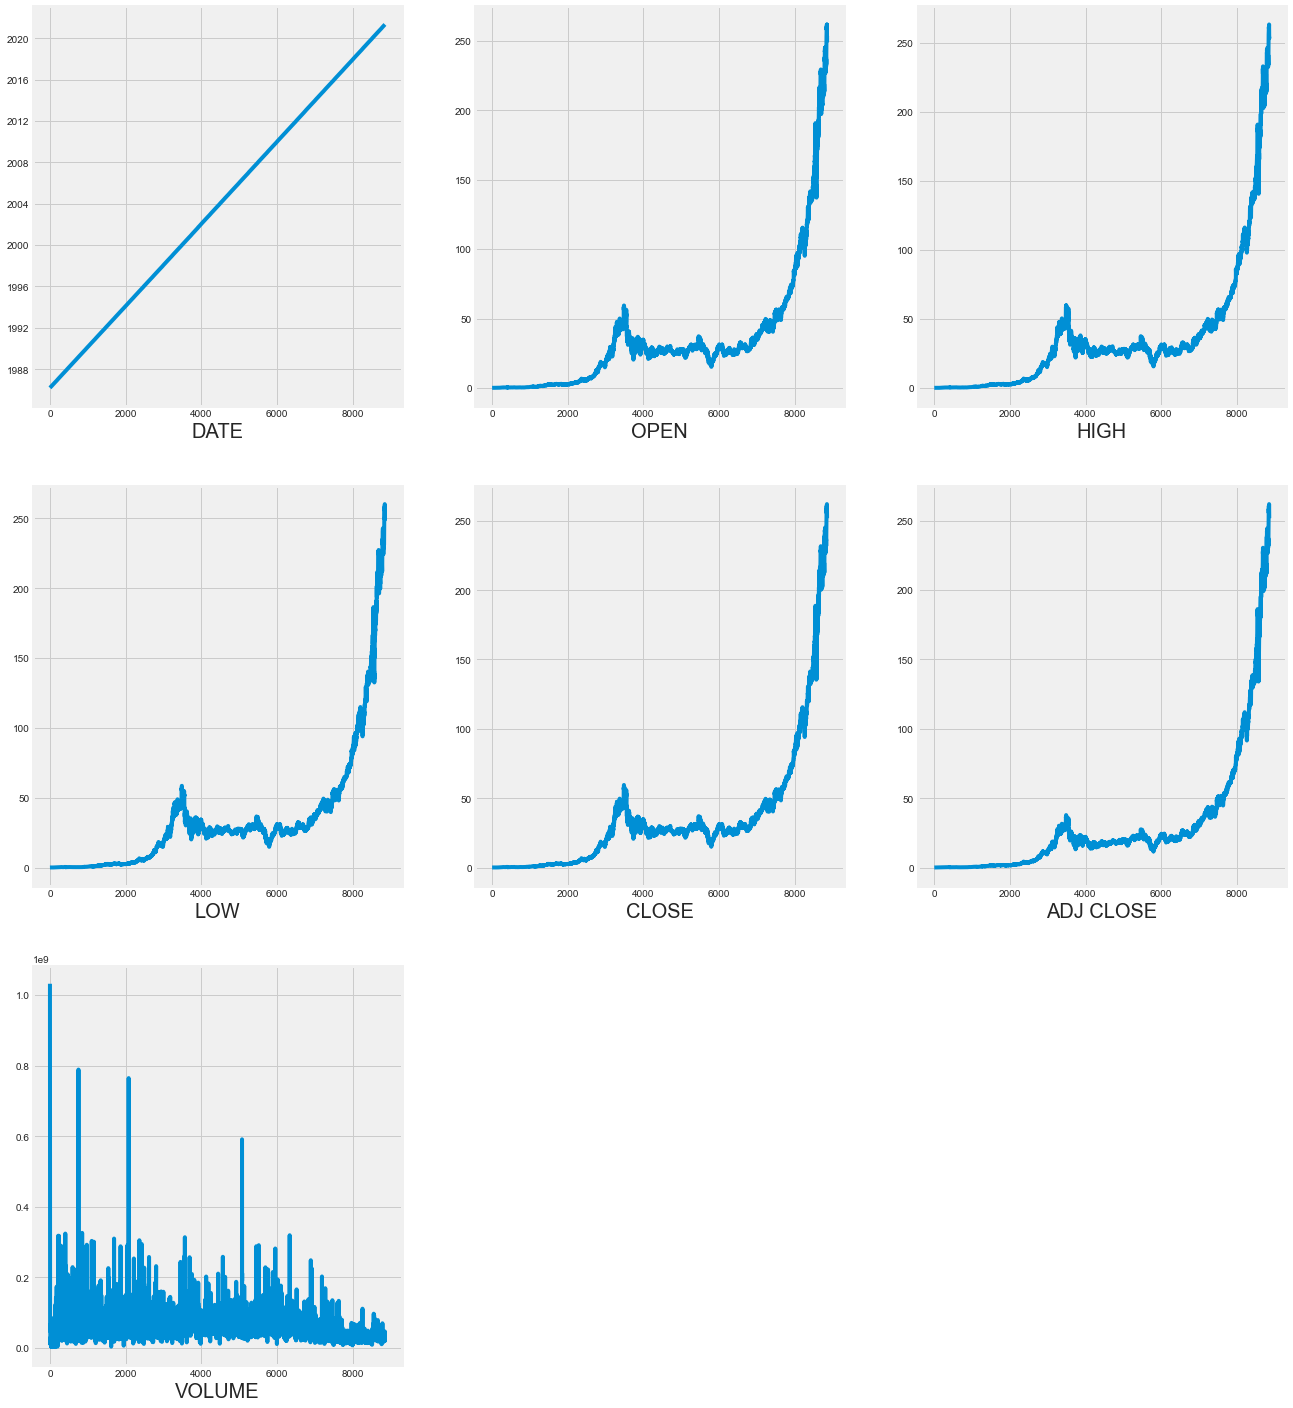

In [18]:
#plotting the feature values 
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.plot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

### Insights from the above plots:-
- OPEN, HIGH, LOW, CLOSE and ADJ CLOSE features are showing similar relationship/trend with respect to time.
- Elbow is observed in the year 2000 after which the values suddenly decrease and then increase wrt time.
- The maximum volume was achieved before the year 1988, the volumne distribution decreases with time.

In [19]:
df=df.set_index('DATE') #Setting the Date feature as an index

In [20]:
df

OPEN        HIGH         LOW       CLOSE   ADJ CLOSE  \
DATE                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061751   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063956   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065059   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063405   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.062302   
...                ...         ...         ...         ...         ...   
2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

                VOLUME  
DATE                    
1986-03-13  1031788800  
1986-03-14   308160000  
1986-03-17   133171200  
1986-03-18    67766400  
1986-03-19    47894400  
...                ...  
2021-04-27    31014200  
2021-04-28    46903100  
2021-04-29    40589000  
2021-04-30    30929200  
2021-05-03    19598900  

[8857 rows x 6 columns]

C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

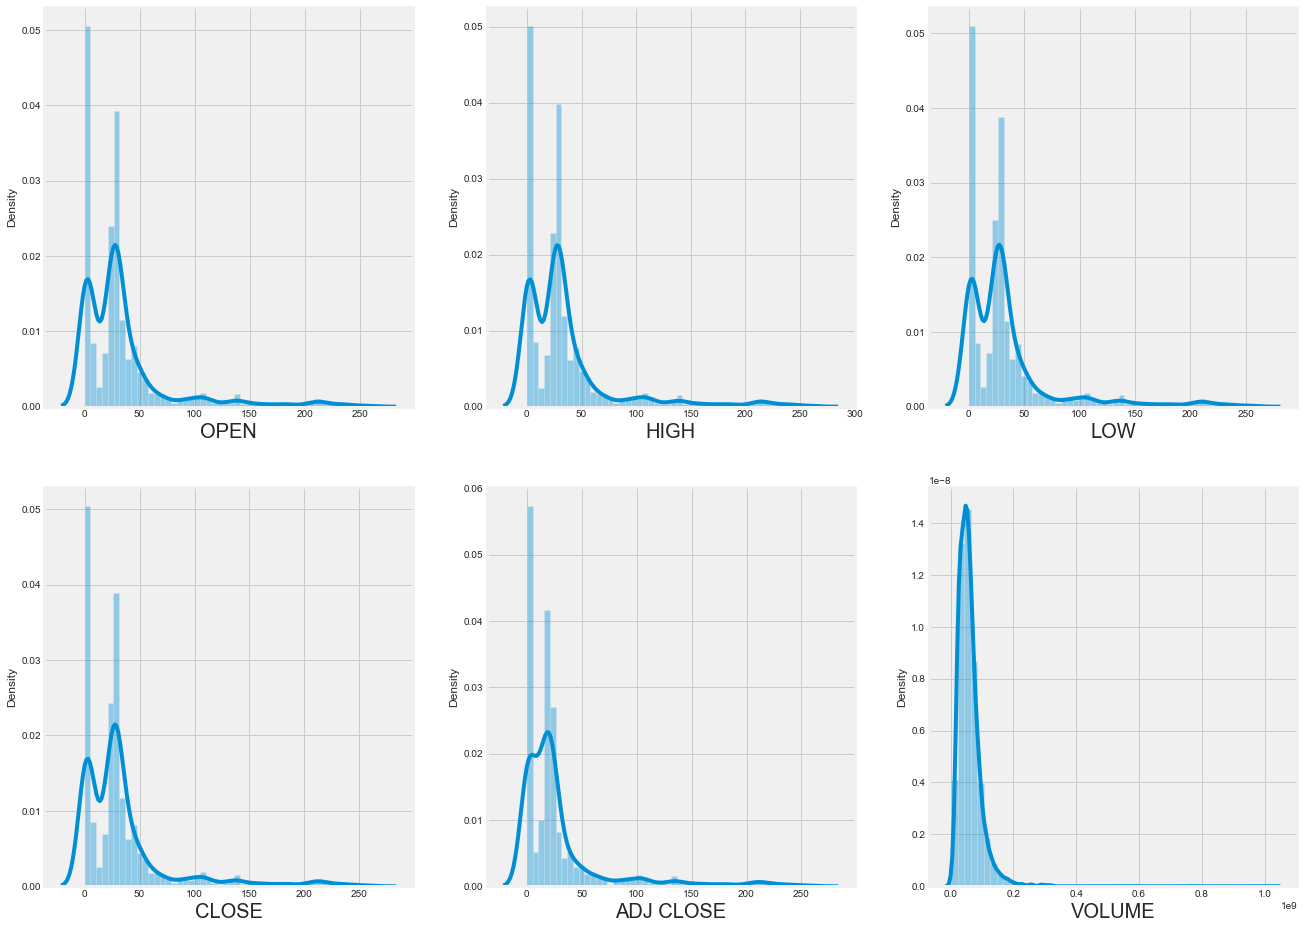

In [21]:
#Plotting the distribution plots for all the features
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

### Insights from the above plots:-
- The distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur. When a distribution of categorical data is organized, you see the number or percentage of individuals in each group.
- From the above plots, we can observe that the density shows a decrease after the point 100 on the X- axis for the first 5 features.
- Max density in volume feature is about 1.7. The density is almost constant at 0.0 and is 0 after 0.2. The data is mostly distributed between 0.0 and 0.2

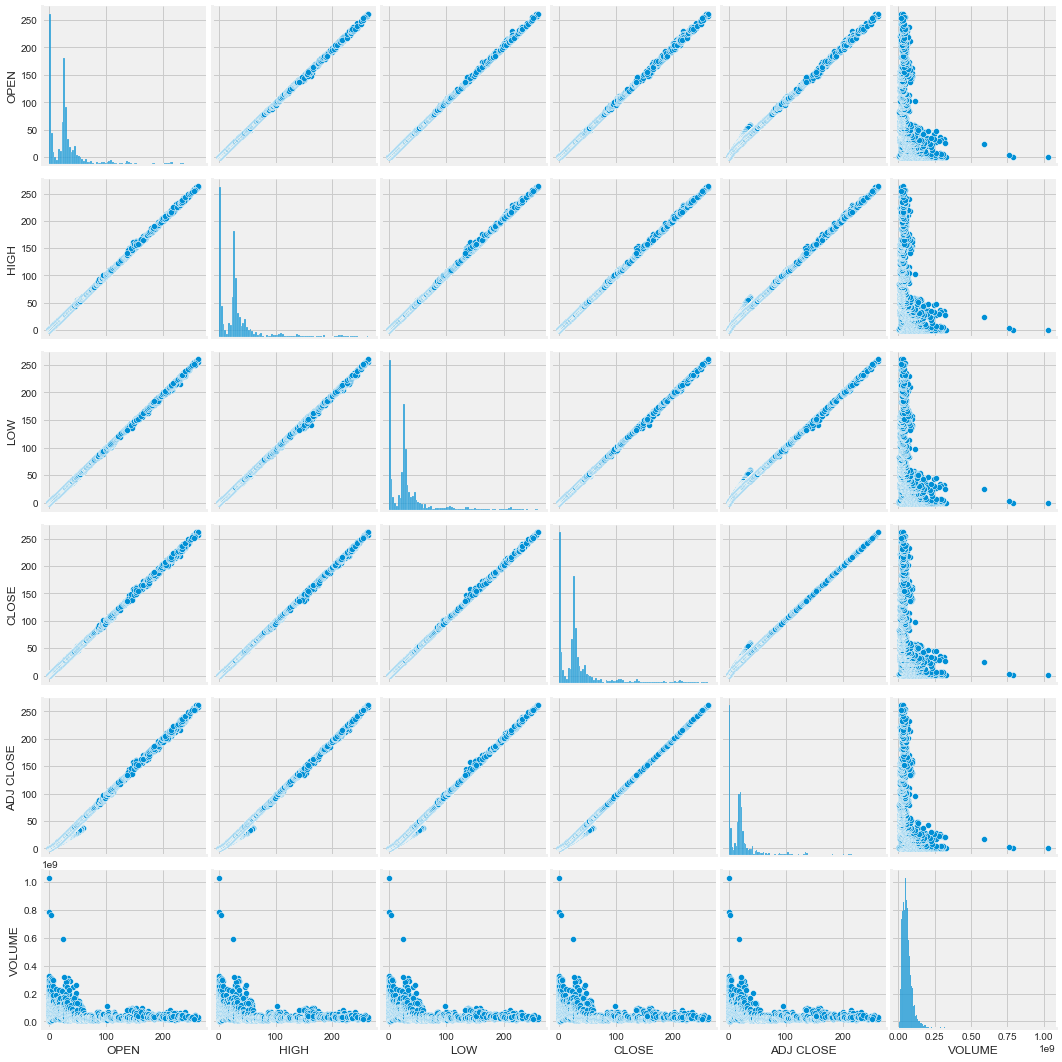

In [22]:
sns.pairplot(data=df) # relation between each and every variable present in Pandas DataFrame.

### Insights from the plot above:-
- Above plot shows pairwise relationships in a dataset.
- Most of the plots are showing linear relationship while others are not showing any specific relationship

<AxesSubplot:>

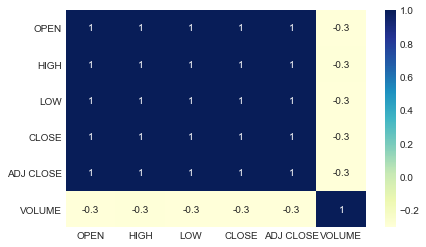

In [23]:
sns.heatmap(df.corr(),annot=True,cmap = "YlGnBu") #Graphical representation of data using colors to visualize the value of the matrix.

### Insights from the plot above:-
- A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.
- It is observed that all the features are highly correlated with each other except volume.

#### Let us check for any outliers

C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anac

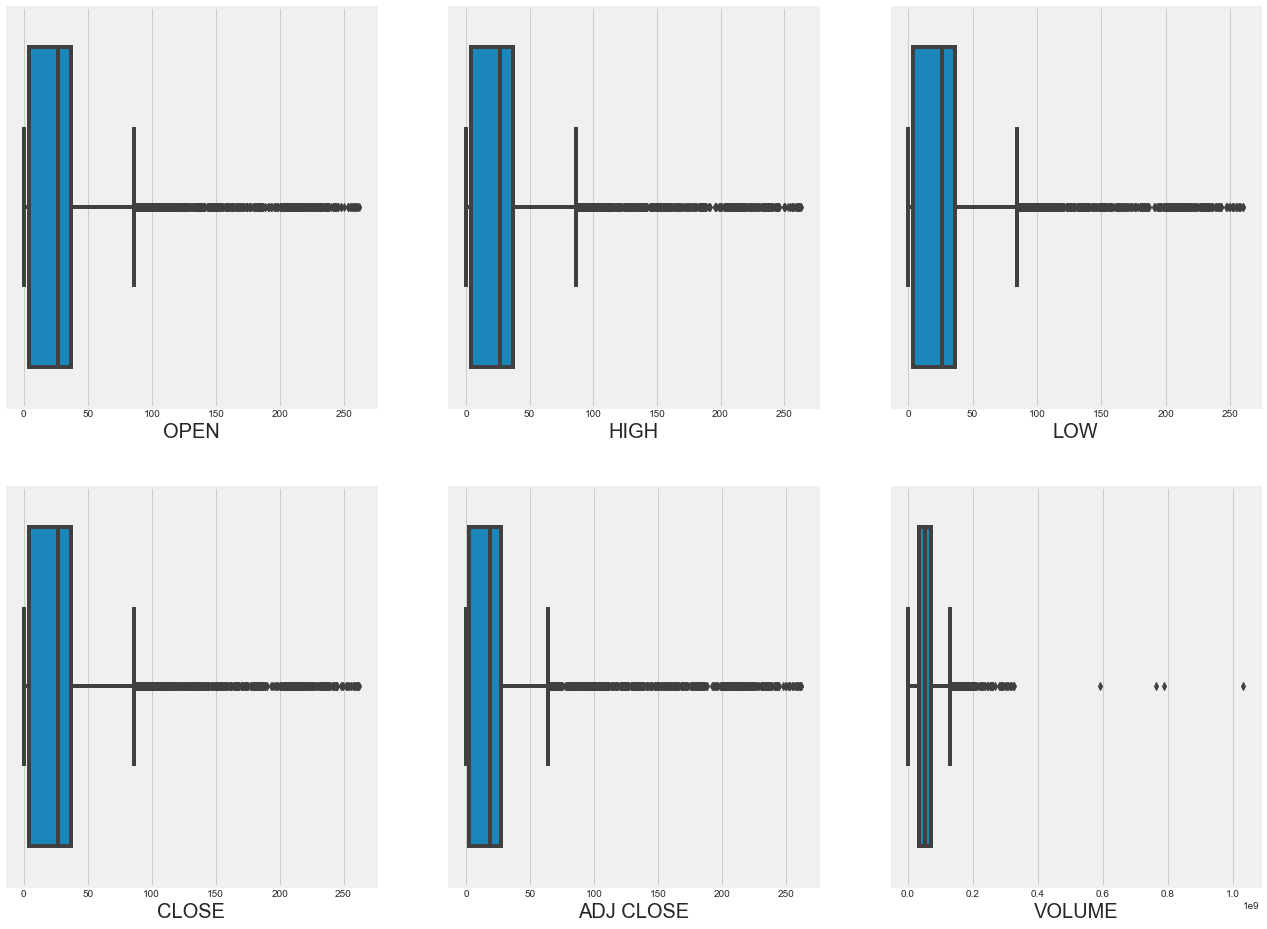

In [24]:
#plotting boxplots for all the features
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

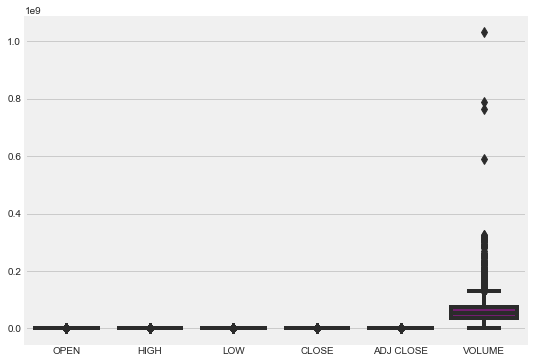

In [25]:
#Vertical visualization of the boxplot
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df, width= 0.8,ax=ax,  fliersize=7)

### Insights from the plot above:-
- Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set.
- Outliers are observed in the feature 'VOLUME'.

Text(0.5, 0, 'DATE')

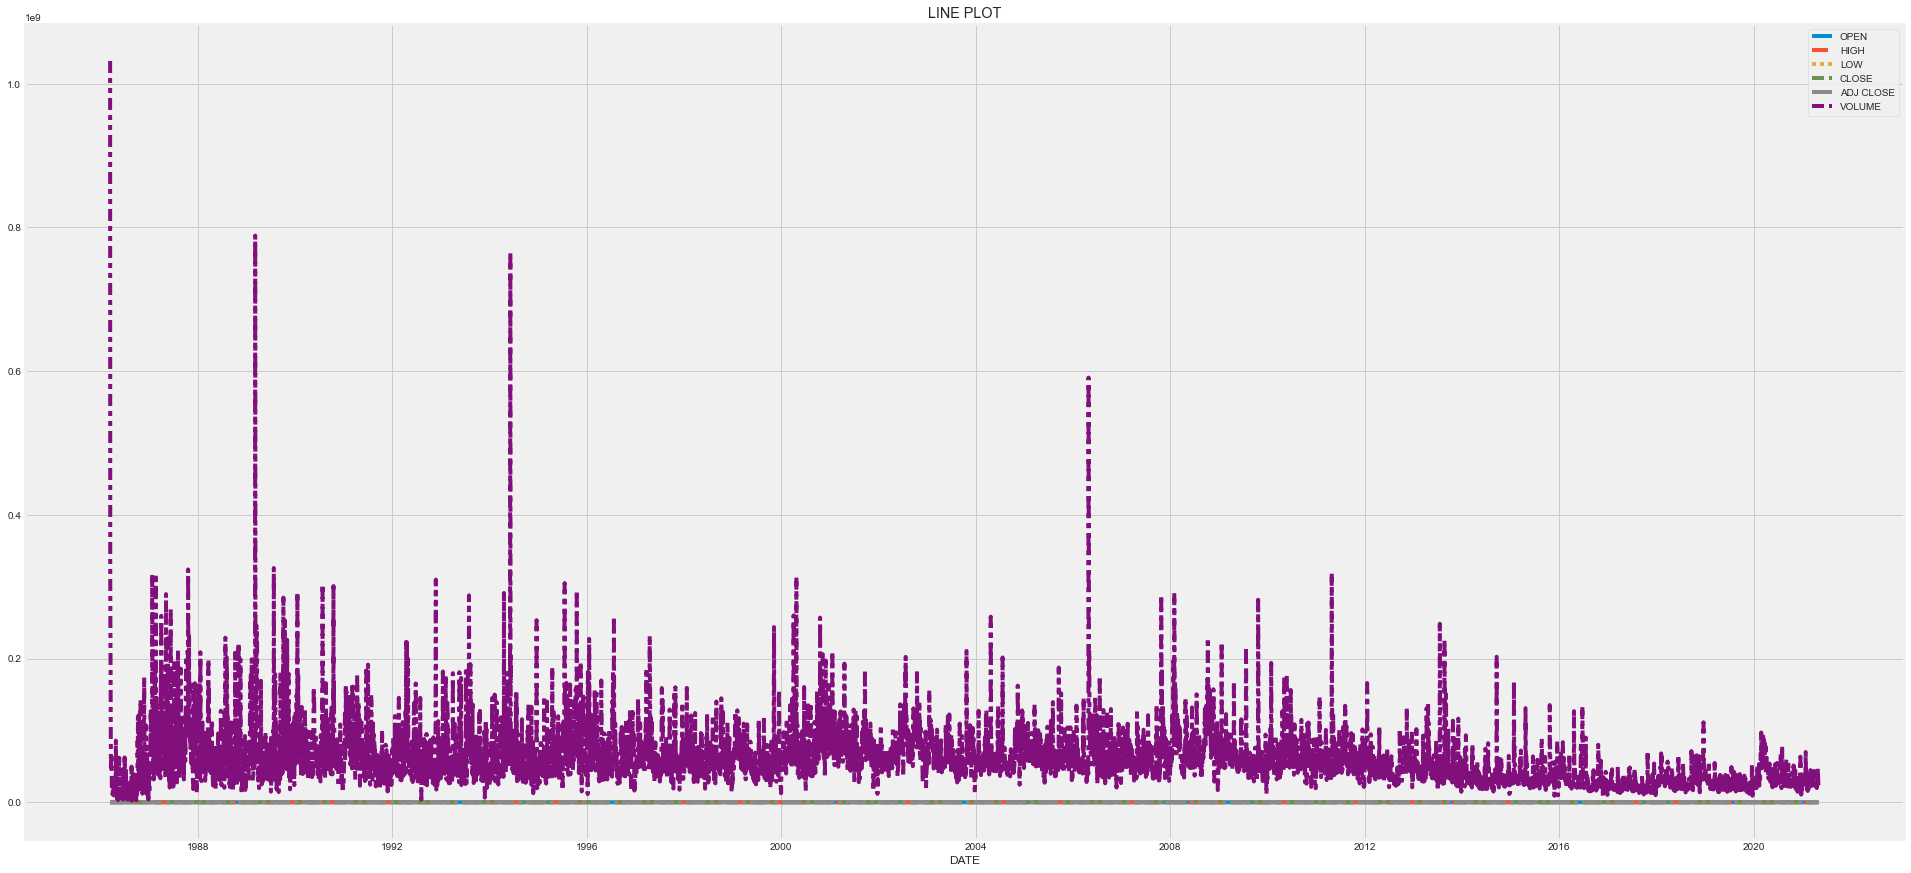

In [26]:
#Displaying data using a number line
plt.figure(figsize=(30,15))
sns.lineplot(data = df)
plt.title('LINE PLOT')
plt.xlabel("DATE")

### Insights from the plot above:-
- The above plot shows a line plot with the possibility of several semantic groupings. The relationship is shown for different subsets of the data using different parameters.

C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anac

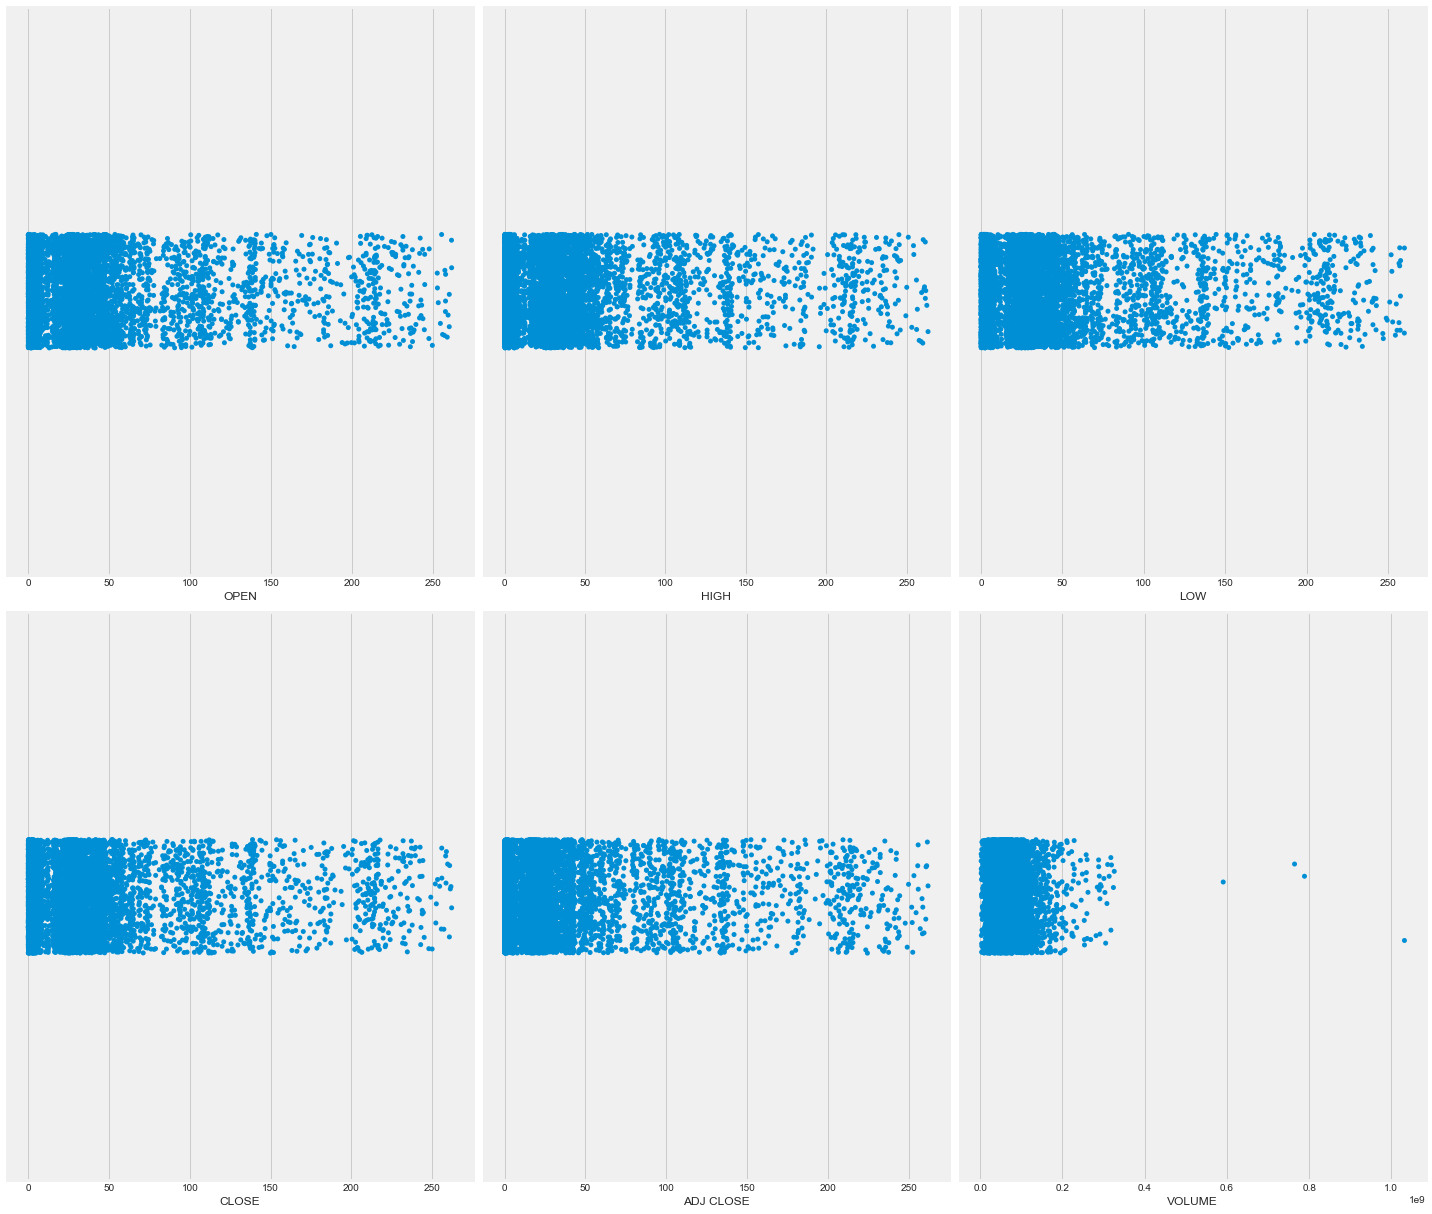

In [27]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(df[column])
    plotnumber+=1
plt.tight_layout()

### Insights from the plots above:-
- The plot above is a graphical data anlysis technique for summarizing a univariate data set.
- This plot shows us how data is distributed for every column.
- The distribution is similar for the first 5 plots.
- Dense distribution is observed from 0 to 50 for the first five plots.
- The data is dispersed from 50 to 200.

In [28]:
#EDA for the time series 

In [29]:
df

OPEN        HIGH         LOW       CLOSE   ADJ CLOSE  \
DATE                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061751   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063956   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065059   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063405   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.062302   
...                ...         ...         ...         ...         ...   
2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

                VOLUME  
DATE                    
1986-03-13  1031788800  
1986-03-14   308160000  
1986-03-17   133171200  
1986-03-18    67766400  
1986-03-19    47894400  
...                ...  
2021-04-27    31014200  
2021-04-28    46903100  
2021-04-29    40589000  
2021-04-30    30929200  
2021-05-03    19598900  

[8857 rows x 6 columns]

In [30]:
df=df.reset_index()

In [31]:
df

DATE        OPEN        HIGH         LOW       CLOSE   ADJ CLOSE  \
0    1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061751   
1    1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063956   
2    1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065059   
3    1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063405   
4    1986-03-19    0.099826    0.100694    0.097222    0.098090    0.062302   
...         ...         ...         ...         ...         ...         ...   
8852 2021-04-27  261.579987  263.190002  260.119995  261.970001  261.970001   
8853 2021-04-28  256.079987  256.540009  252.949997  254.559998  254.559998   
8854 2021-04-29  255.460007  256.100006  249.000000  252.509995  252.509995   
8855 2021-04-30  249.740005  253.080002  249.600006  252.179993  252.179993   
8856 2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001   

          VOLUME  
0     1031788800  
1      308160000  
2      133171200  
3       67766400  
4       47894400  
...          ...  
8852    31014200  
8853    46903100  
8854    40589000  
8855    30929200  
8856    19598900  

[8857 rows x 7 columns]

<AxesSubplot:>

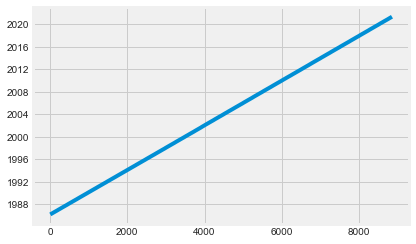

In [32]:
df['DATE'].plot()

- Linear relationship is observed in the plot above

In [33]:
df['DATE'].describe()

<ipython-input-33-559f375a970b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['DATE'].describe()


count                    8857
unique                   8857
top       1989-12-27 00:00:00
freq                        1
first     1986-03-13 00:00:00
last      2021-05-03 00:00:00
Name: DATE, dtype: object

In [34]:
df['DATE'].mean()

Timestamp('2003-09-30 05:14:45.672362496')

#### Checking for randomness in the dataset

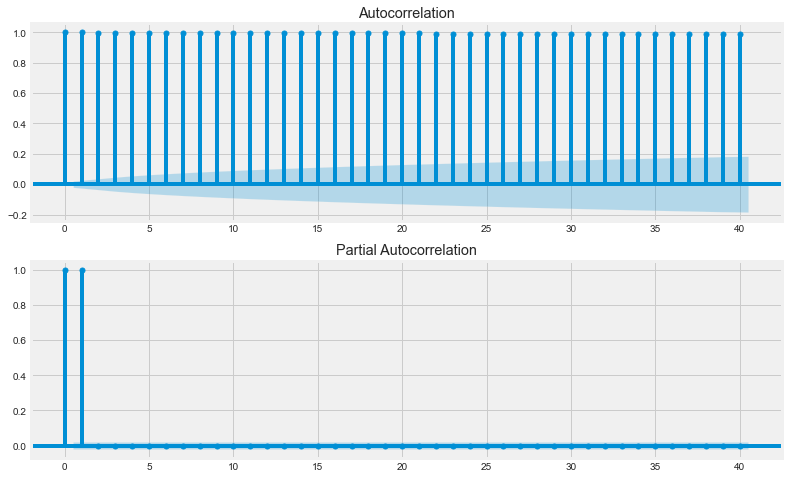

In [35]:
import statsmodels.api as sm
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['DATE'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['DATE'], lags=40, ax=ax2)

- A positive correlation indicates that large current values correspond with large values at the specified lag
- a negative correlation indicates that large current values correspond with small values at the specified lag.
- The absolute value of a correlation is a measure of the strength of the association, with larger absolute values indicating stronger relationships.

## EDA of the combined dataset

In [36]:
data=pd.read_csv('stock_data.csv') #reading the csv file

In [37]:
data.head()#displaying the top 5 values

Date     Open     High      Low    Close    Volume  OpenInt Stock
0  1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0  AAPL
1  1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0  AAPL
2  1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0  AAPL
3  1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0  AAPL
4  1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0  AAPL

In [38]:
data.tail()#displaying the lower 5 values

Date    Open     High      Low   Close    Volume  OpenInt Stock
19581  2017-11-06  178.56  180.450  178.310  180.17  13275578        0    FB
19582  2017-11-07  180.50  180.748  179.403  180.25  12903836        0    FB
19583  2017-11-08  179.79  180.350  179.110  179.56  10467606        0    FB
19584  2017-11-09  178.31  179.400  177.090  179.30  12602188        0    FB
19585  2017-11-10  178.35  179.100  177.960  178.46  11060355        0    FB

In [39]:
data.describe() #description of the dataset

Open          High           Low         Close        Volume  \
count  19586.000000  19586.000000  19586.000000  19586.000000  1.958600e+04   
mean      37.408582     37.881571     36.906405     37.406667  8.100395e+07   
std       59.492049     60.287797     58.622548     59.480058  7.982366e+07   
min        0.067200      0.067200      0.067200      0.067200  0.000000e+00   
25%        1.412300      1.440600      1.384100      1.412300  3.385552e+07   
50%       19.649500     19.933000     19.363000     19.640000  6.294731e+07   
75%       38.605000     39.075750     38.229250     38.655500  1.010604e+08   
max      386.690000    389.610000    379.345000    385.000000  2.069770e+09   

       OpenInt  
count  19586.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [40]:
data.shape#dimentions of the dataset

(19586, 8)

In [41]:
data.info()#basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [42]:
data.duplicated()#checking for any duplicated value

0        False
1        False
2        False
3        False
4        False
         ...  
19581    False
19582    False
19583    False
19584    False
19585    False
Length: 19586, dtype: bool

In [43]:
data.duplicated().sum()# checking for the number of duplicated values

0

In [44]:
data.isnull()#checking for any null value

Date   Open   High    Low  Close  Volume  OpenInt  Stock
0      False  False  False  False  False   False    False  False
1      False  False  False  False  False   False    False  False
2      False  False  False  False  False   False    False  False
3      False  False  False  False  False   False    False  False
4      False  False  False  False  False   False    False  False
...      ...    ...    ...    ...    ...     ...      ...    ...
19581  False  False  False  False  False   False    False  False
19582  False  False  False  False  False   False    False  False
19583  False  False  False  False  False   False    False  False
19584  False  False  False  False  False   False    False  False
19585  False  False  False  False  False   False    False  False

[19586 rows x 8 columns]

In [45]:
data.isnull().sum()#checking for number of null values

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [46]:
data.columns=data.columns.str.upper() #Renaming the columns in uppercase

In [47]:
data.head(2)#displaying top 2 values

DATE     OPEN     HIGH      LOW    CLOSE    VOLUME  OPENINT STOCK
0  1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0  AAPL
1  1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0  AAPL

In [48]:
data['DATE']= pd.to_datetime(data['DATE'],format = "%Y-%m-%d") #converting 'DATE' from object to datetime Dtype

In [49]:
data.info()#successfully converted 'DATE' dtype to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     19586 non-null  datetime64[ns]
 1   OPEN     19586 non-null  float64       
 2   HIGH     19586 non-null  float64       
 3   LOW      19586 non-null  float64       
 4   CLOSE    19586 non-null  float64       
 5   VOLUME   19586 non-null  int64         
 6   OPENINT  19586 non-null  int64         
 7   STOCK    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.2+ MB


In [50]:
data.columns#columns in the dataset

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'OPENINT', 'STOCK'], dtype='object')

In [51]:
data['STOCK'].unique()#unique values in 'STOCK' feature

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [52]:
data.groupby(['STOCK']).mean()#grouping by the mean of 'STOCK' feature

OPEN        HIGH         LOW       CLOSE        VOLUME  OPENINT
STOCK                                                                       
AAPL    22.284350   22.495867   22.054244   22.281018  1.066416e+08      0.0
FB      83.543667   84.384940   82.630555   83.543827  3.770716e+07      0.0
MSFT    18.977859   19.187219   18.773635   18.984698  7.945800e+07      0.0
TSLA   150.389741  152.898737  147.688064  150.355047  4.416508e+06      0.0

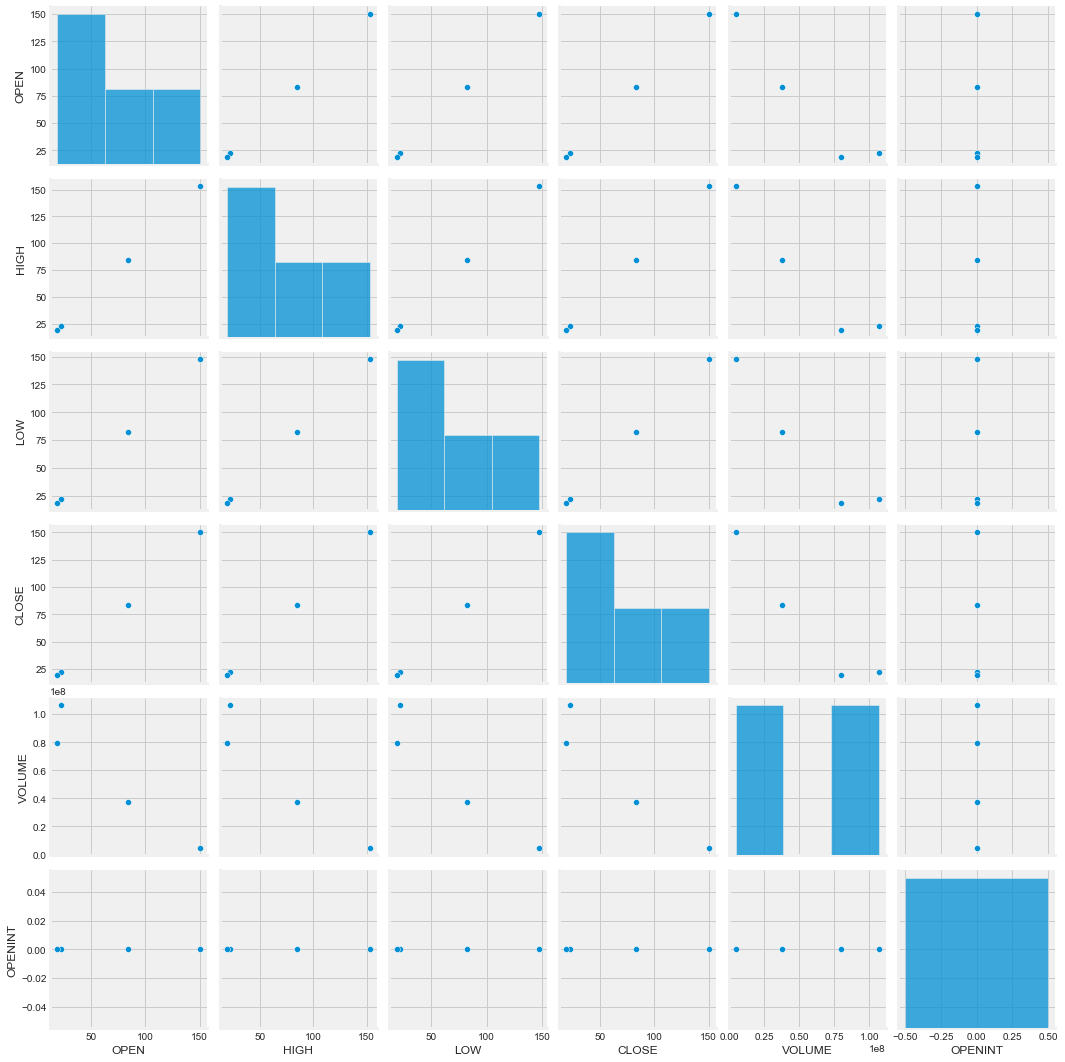

In [53]:
sns.pairplot(data.groupby(['STOCK']).mean())#pairplot

We have grouped the whole dataset with respect to companies by which we can seprate the dataset accordingly

<AxesSubplot:xlabel='STOCK'>

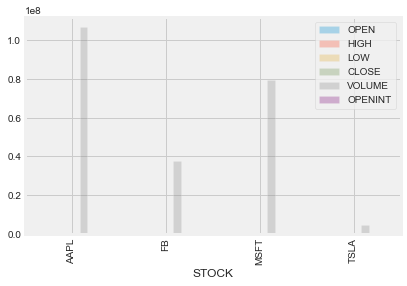

In [54]:
data.groupby(['STOCK']).mean().plot( kind='bar',alpha=0.3)

C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\atish\anac

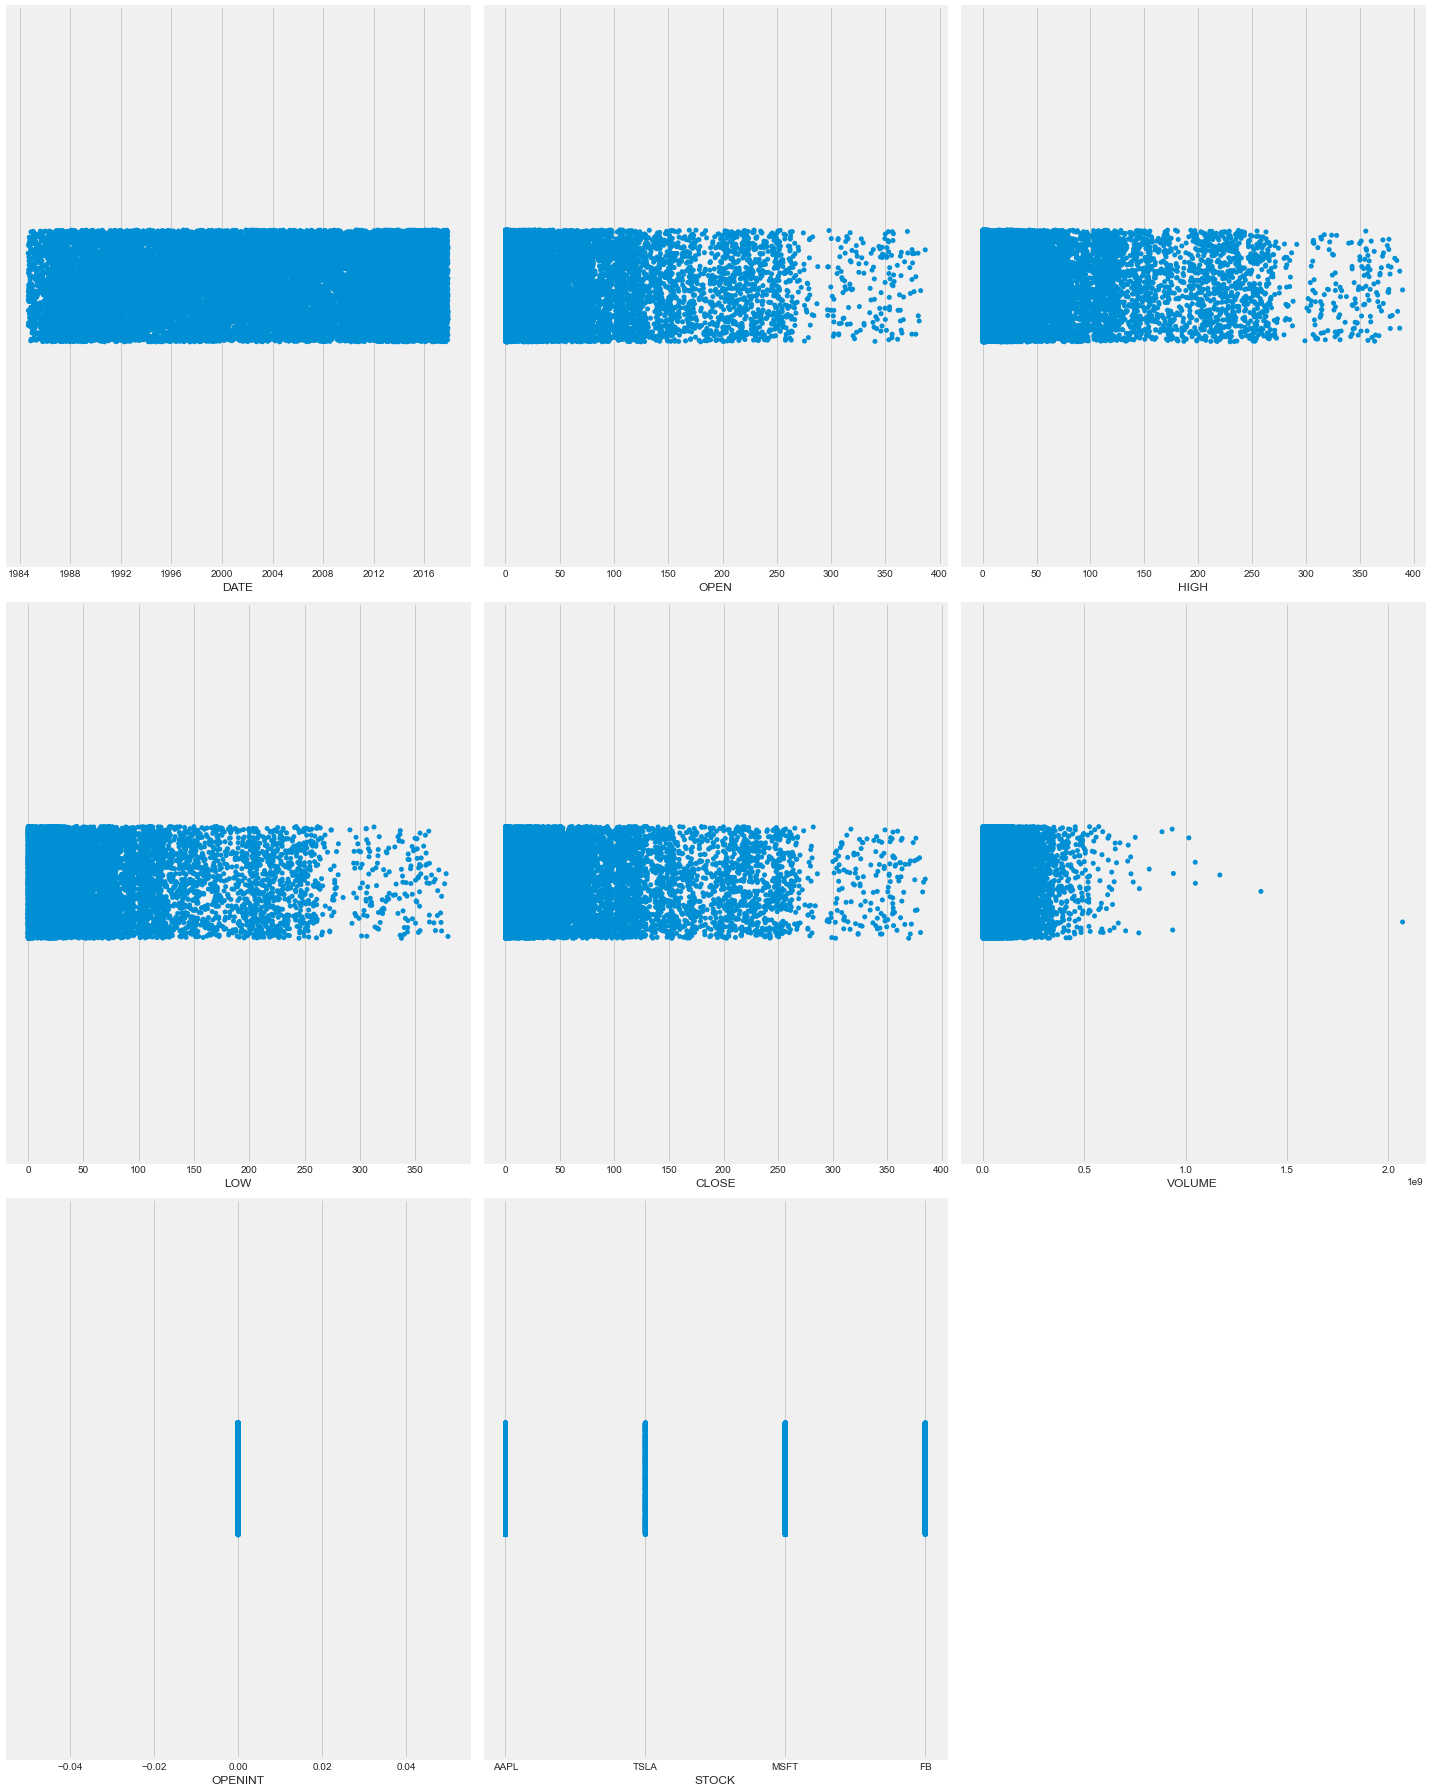

In [55]:
#stripplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(data[column])
    plotnumber+=1
plt.tight_layout()

Above plot is a strip plot. A strip plot is a graphical data anlysis technique for summarizing a univariate data set which shows us how the values are distributed. Above dataset shows how the features are distributed with respect to time.

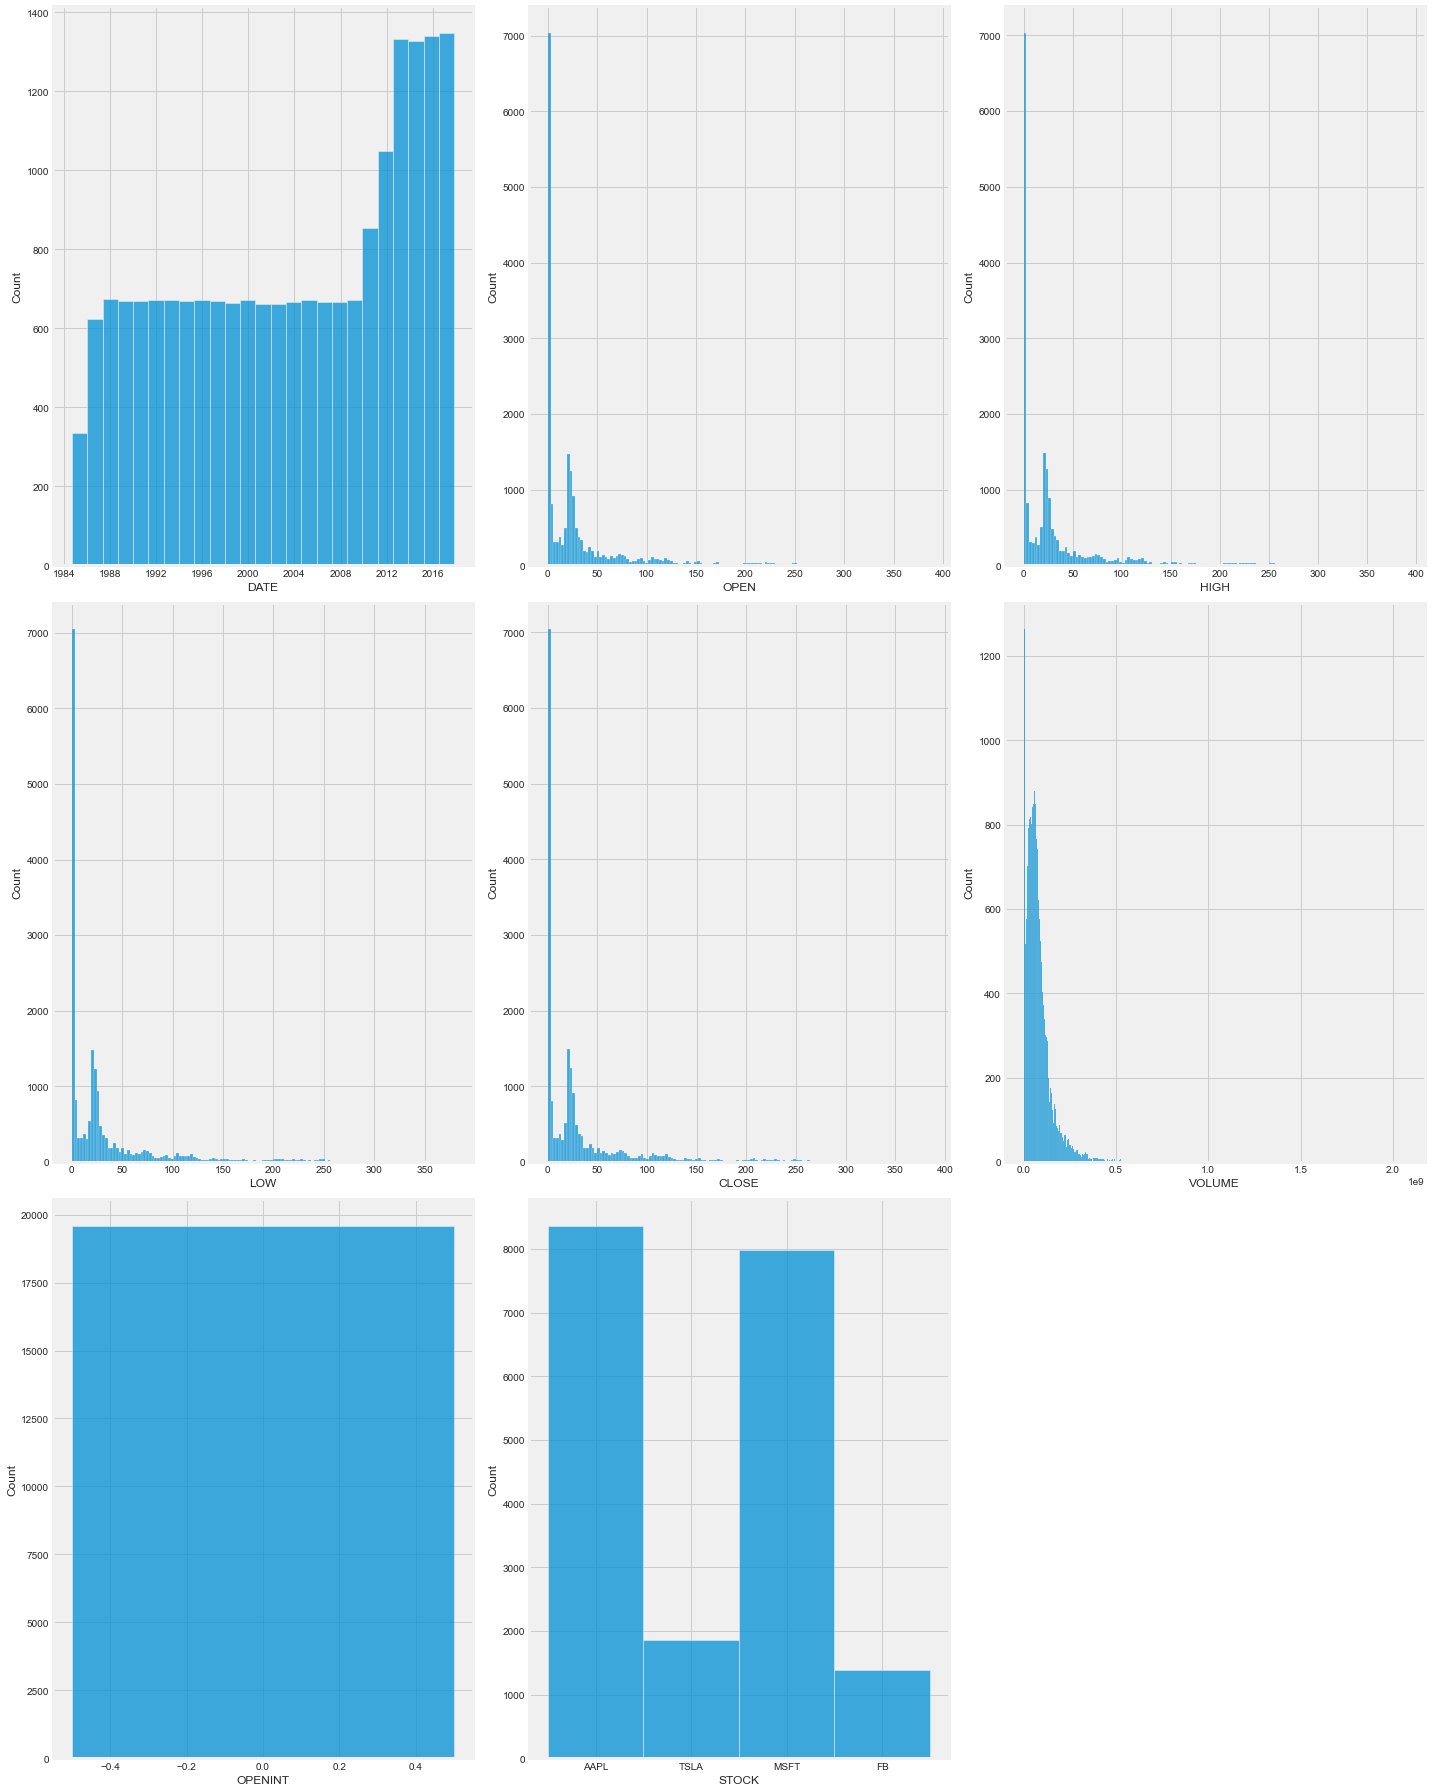

In [56]:
#Histogram of the dataset
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
    plotnumber+=1
plt.tight_layout()

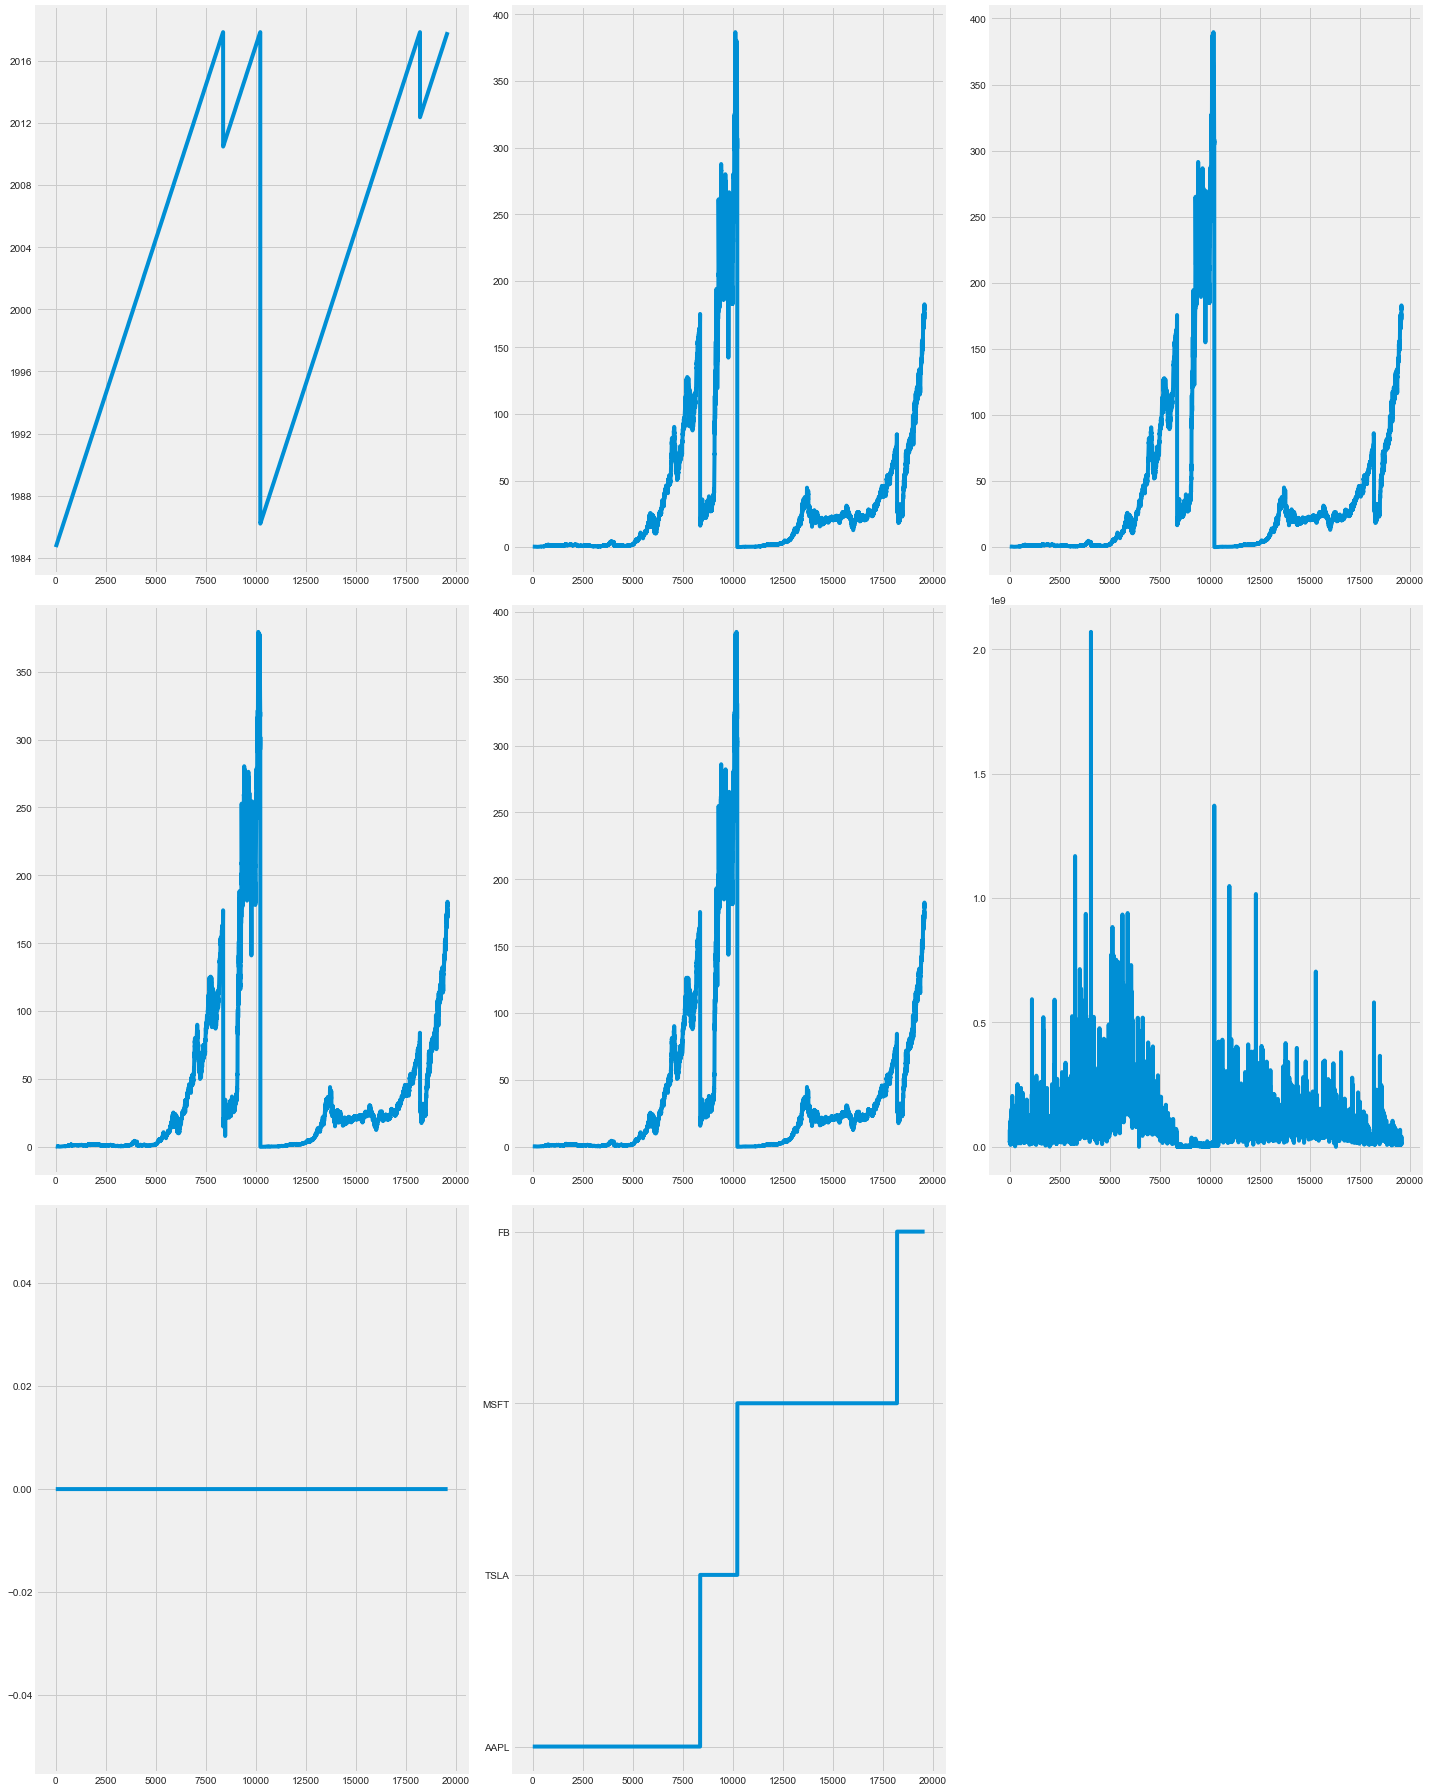

In [57]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        plt.plot(data[column])
    plotnumber+=1
plt.tight_layout()

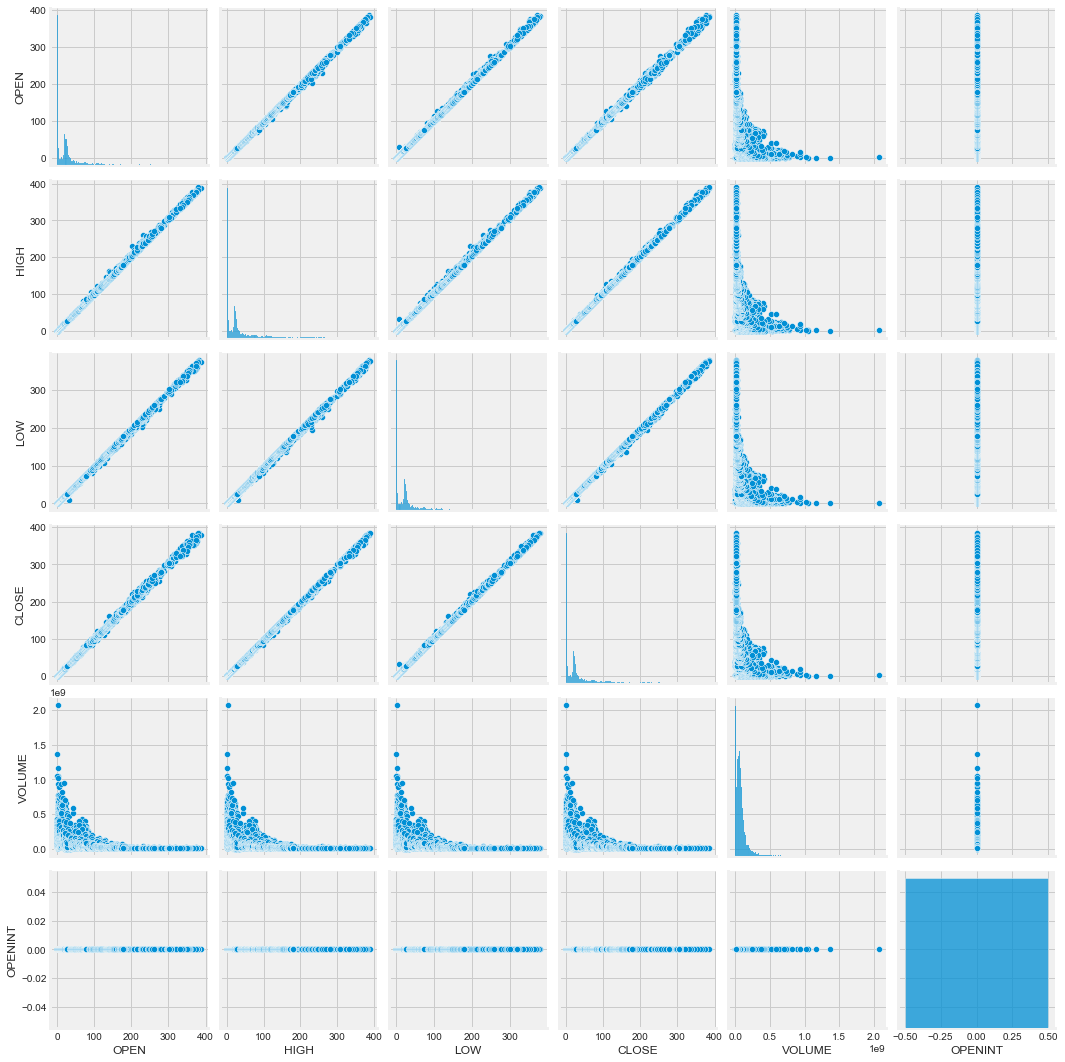

In [58]:
sns.pairplot(data=data)

<AxesSubplot:>

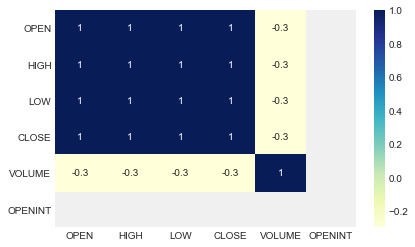

In [59]:
sns.heatmap(data.corr(),annot=True,cmap = "YlGnBu") #Graphical representation of data using colors to visualize the value of the matrix.

<AxesSubplot:>

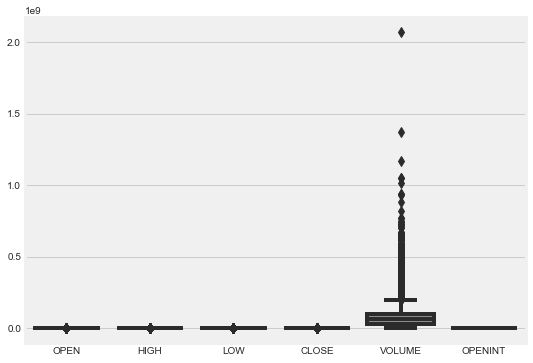

In [60]:
#Vertical visualization of the boxplot
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data, width= 0.8,ax=ax, fliersize=7)

Text(0.5, 0, 'DATE')

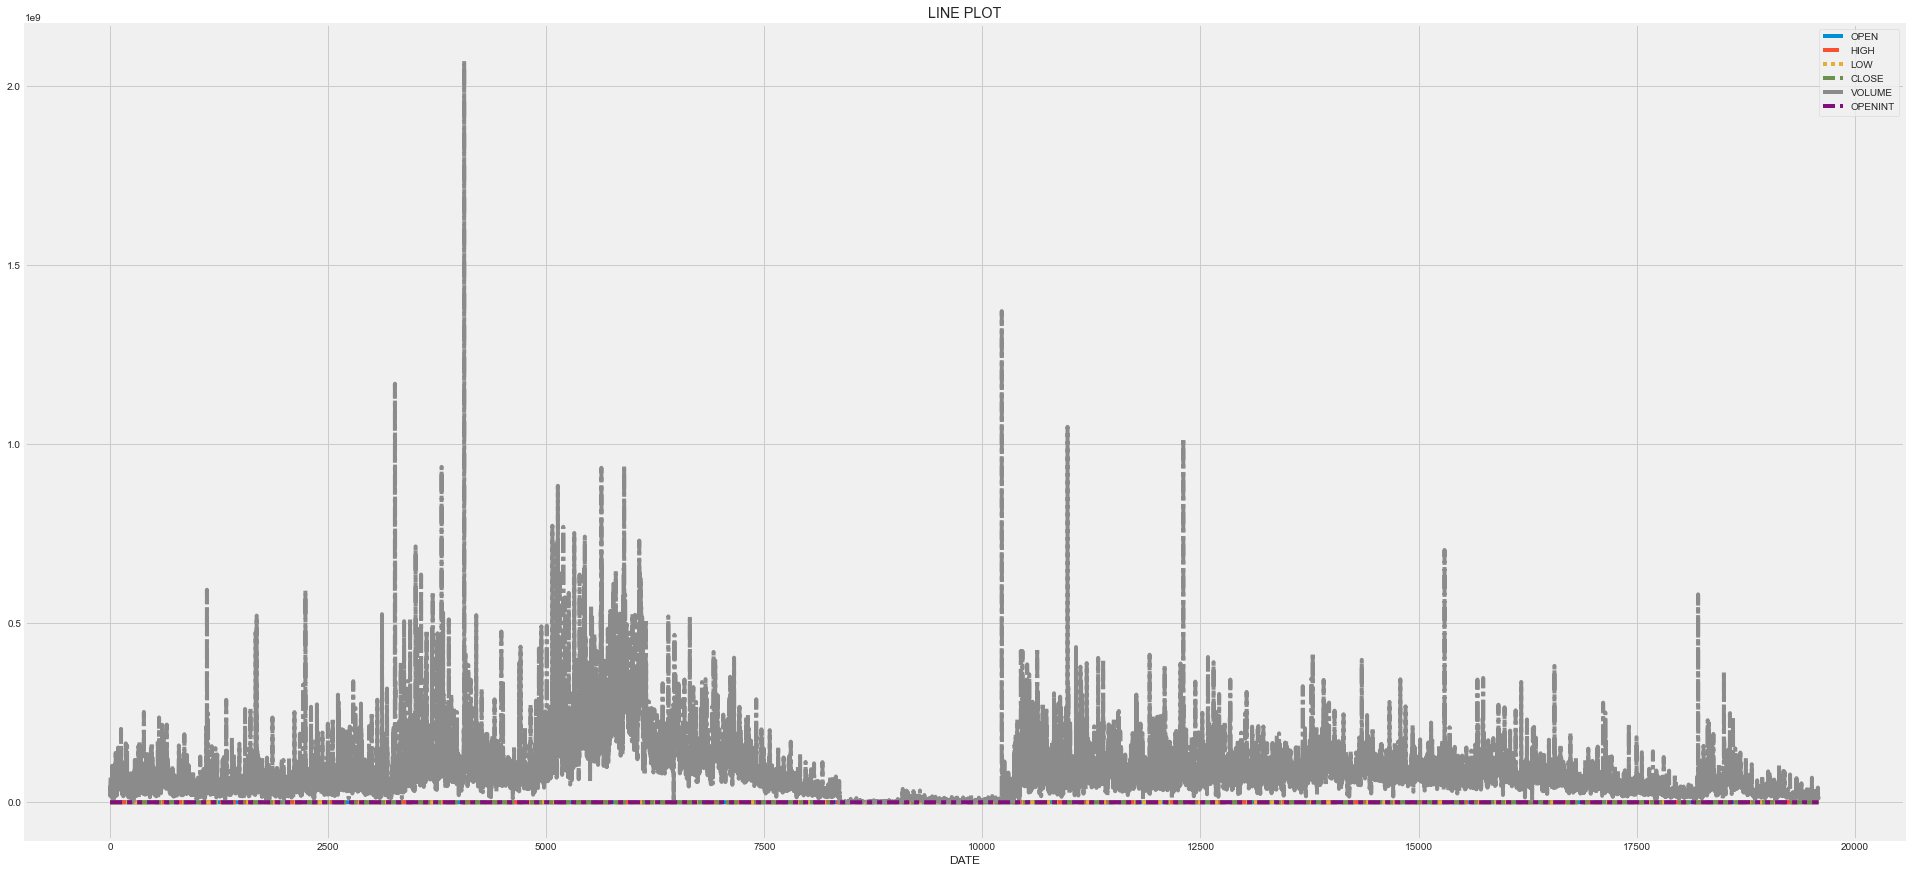

In [61]:
#Displaying data using a number line
plt.figure(figsize=(30,15))
sns.lineplot(data = data)
plt.title('LINE PLOT')
plt.xlabel("DATE")

In [62]:
data=data.reset_index()

In [63]:
data.head()

index       DATE     OPEN     HIGH      LOW    CLOSE    VOLUME  OPENINT  \
0      0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0   
1      1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0   
2      2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0   
3      3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0   
4      4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0   

  STOCK  
0  AAPL  
1  AAPL  
2  AAPL  
3  AAPL  
4  AAPL

Text(0.5, 1.0, "PLOT SHOWING DISTRIBUTION OF VALUES OF 'DATE'")

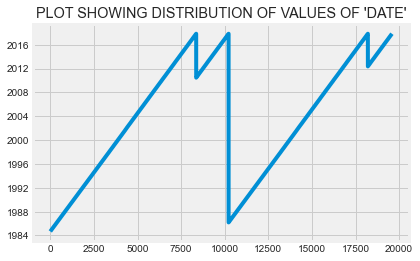

In [64]:
data['DATE'].plot()
plt.title("PLOT SHOWING DISTRIBUTION OF VALUES OF 'DATE'")

In [65]:
data['DATE'].describe()#description of the dataset

<ipython-input-65-6856dde84afe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['DATE'].describe()#description of the dataset


count                   19586
unique                   8366
top       2017-07-19 00:00:00
freq                        4
first     1984-09-07 00:00:00
last      2017-11-10 00:00:00
Name: DATE, dtype: object

In [66]:
data["DATE"].mean()#mean of 'DATE'

Timestamp('2003-10-08 22:42:56.942724736')

### Checking for randomness in the data

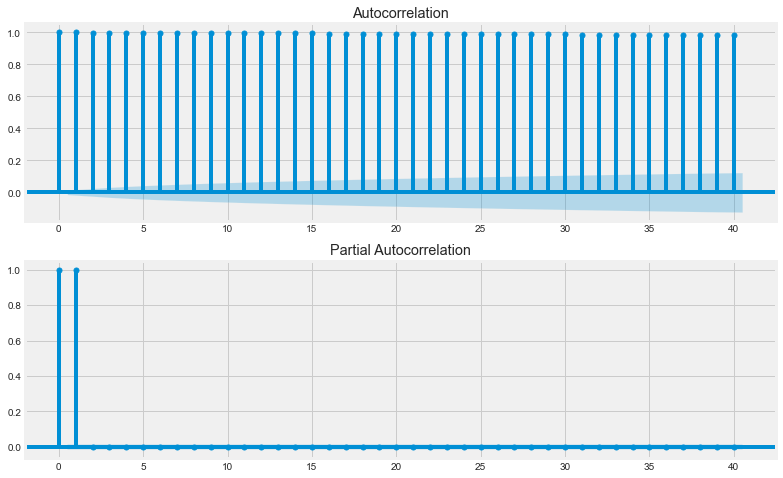

In [67]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['DATE'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['DATE'], lags=40, ax=ax2)

### EDA on the basis of individual stock

In [68]:
data.head()#displaying the first 5 values

index       DATE     OPEN     HIGH      LOW    CLOSE    VOLUME  OPENINT  \
0      0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0   
1      1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0   
2      2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0   
3      3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0   
4      4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0   

  STOCK  
0  AAPL  
1  AAPL  
2  AAPL  
3  AAPL  
4  AAPL

In [69]:
data.drop(columns=['OPENINT'], inplace=True)#Dropping the OPENINT column

In [70]:
data.head()#column dropped

index       DATE     OPEN     HIGH      LOW    CLOSE    VOLUME STOCK
0      0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030  AAPL
1      1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532  AAPL
2      2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199  AAPL
3      3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801  AAPL
4      4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062  AAPL

In [71]:
stock_data=data.groupby('STOCK')#grouping the values by STOCK

In [72]:
stock_data.head()#values grouped

index       DATE      OPEN      HIGH       LOW     CLOSE      VOLUME  \
0          0 1984-09-07   0.42388   0.42902   0.41874   0.42388    23220030   
1          1 1984-09-10   0.42388   0.42516   0.41366   0.42134    18022532   
2          2 1984-09-11   0.42516   0.43668   0.42516   0.42902    42498199   
3          3 1984-09-12   0.42902   0.43157   0.41618   0.41618    37125801   
4          4 1984-09-13   0.43927   0.44052   0.43927   0.43927    57822062   
8364    8364 2010-06-28  17.00000  17.00000  17.00000  17.00000           0   
8365    8365 2010-06-29  19.00000  25.00000  17.54000  23.89000    18783276   
8366    8366 2010-06-30  25.79000  30.42000  23.30000  23.83000    17194394   
8367    8367 2010-07-01  25.00000  25.92000  20.27000  21.96000     8229863   
8368    8368 2010-07-02  23.00000  23.10000  18.71000  19.20000     5141807   
10222  10222 1986-03-13   0.06720   0.07533   0.06720   0.07533  1371330506   
10223  10223 1986-03-14   0.07533   0.07533   0.07533   0.07533   409569463   
10224  10224 1986-03-17   0.07533   0.07533   0.07533   0.07533   176995245   
10225  10225 1986-03-18   0.07533   0.07533   0.07533   0.07533    90067008   
10226  10226 1986-03-19   0.07533   0.07533   0.07533   0.07533    63655515   
18205  18205 2012-05-18  42.05000  45.00000  38.00000  38.23000   580438450   
18206  18206 2012-05-21  36.53000  36.66000  33.00000  34.03000   169418988   
18207  18207 2012-05-22  32.61000  33.59000  30.94000  31.00000   101876406   
18208  18208 2012-05-23  31.37000  32.50000  31.36000  32.00000    73678512   
18209  18209 2012-05-24  32.95000  33.21000  31.77000  33.03000    42560731   

      STOCK  
0      AAPL  
1      AAPL  
2      AAPL  
3      AAPL  
4      AAPL  
8364   TSLA  
8365   TSLA  
8366   TSLA  
8367   TSLA  
8368   TSLA  
10222  MSFT  
10223  MSFT  
10224  MSFT  
10225  MSFT  
10226  MSFT  
18205    FB  
18206    FB  
18207    FB  
18208    FB  
18209    FB

In [73]:
data['STOCK'].unique()#unique values in stock

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [74]:
#Diving the data on the basis of company
df_AAPL = data[data.STOCK=='AAPL']
df_TSLA = data[data.STOCK=='TSLA']
df_MSFT = data[data.STOCK=='MSFT']
df_FB   =data[data.STOCK=='FB']

In [75]:
df_AAPL.head() #displaying the dataframes created

index       DATE     OPEN     HIGH      LOW    CLOSE    VOLUME STOCK
0      0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030  AAPL
1      1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532  AAPL
2      2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199  AAPL
3      3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801  AAPL
4      4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062  AAPL

In [76]:
df_TSLA.head()

index       DATE   OPEN   HIGH    LOW  CLOSE    VOLUME STOCK
8364   8364 2010-06-28  17.00  17.00  17.00  17.00         0  TSLA
8365   8365 2010-06-29  19.00  25.00  17.54  23.89  18783276  TSLA
8366   8366 2010-06-30  25.79  30.42  23.30  23.83  17194394  TSLA
8367   8367 2010-07-01  25.00  25.92  20.27  21.96   8229863  TSLA
8368   8368 2010-07-02  23.00  23.10  18.71  19.20   5141807  TSLA

In [77]:
df_MSFT.head()

index       DATE     OPEN     HIGH      LOW    CLOSE      VOLUME STOCK
10222  10222 1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506  MSFT
10223  10223 1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463  MSFT
10224  10224 1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245  MSFT
10225  10225 1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008  MSFT
10226  10226 1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515  MSFT

In [78]:
df_FB.head()

index       DATE   OPEN   HIGH    LOW  CLOSE     VOLUME STOCK
18205  18205 2012-05-18  42.05  45.00  38.00  38.23  580438450    FB
18206  18206 2012-05-21  36.53  36.66  33.00  34.03  169418988    FB
18207  18207 2012-05-22  32.61  33.59  30.94  31.00  101876406    FB
18208  18208 2012-05-23  31.37  32.50  31.36  32.00   73678512    FB
18209  18209 2012-05-24  32.95  33.21  31.77  33.03   42560731    FB

In [79]:
companies=[df_AAPL, df_MSFT,df_TSLA,df_FB]
company_name=['df_AAPL', 'df_MSFT','df_TSLA','df_FB']

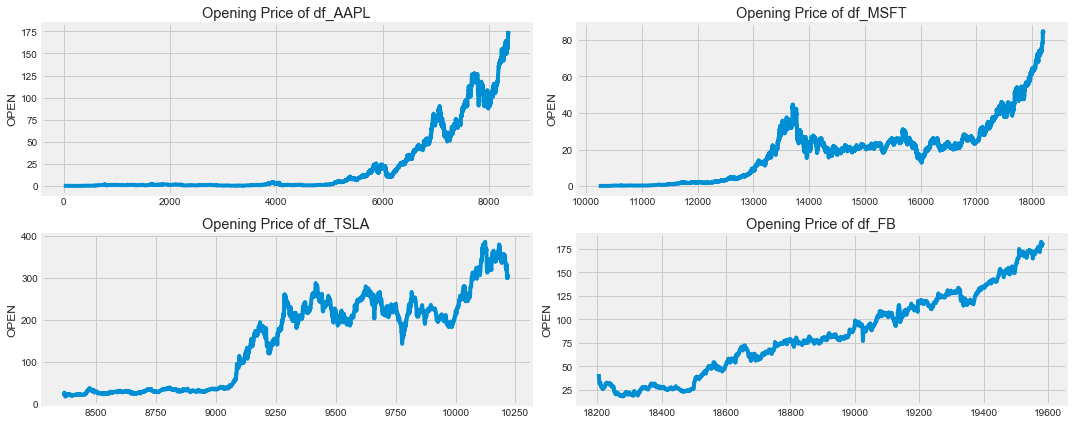

In [80]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['OPEN'].plot()
    plt.ylabel('OPEN')
    plt.xlabel(None)
    plt.title(f"Opening Price of {company_name[i - 1]}")
    
plt.tight_layout()

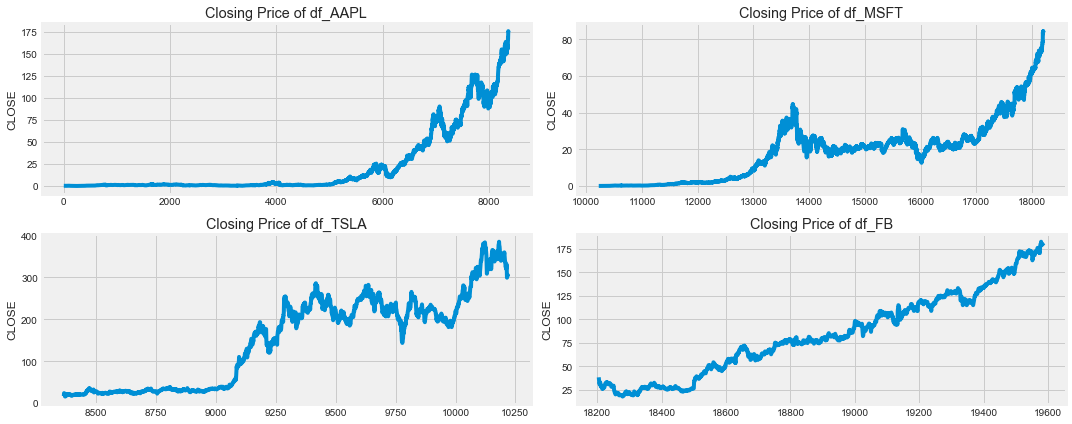

In [81]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['CLOSE'].plot()
    plt.ylabel('CLOSE')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

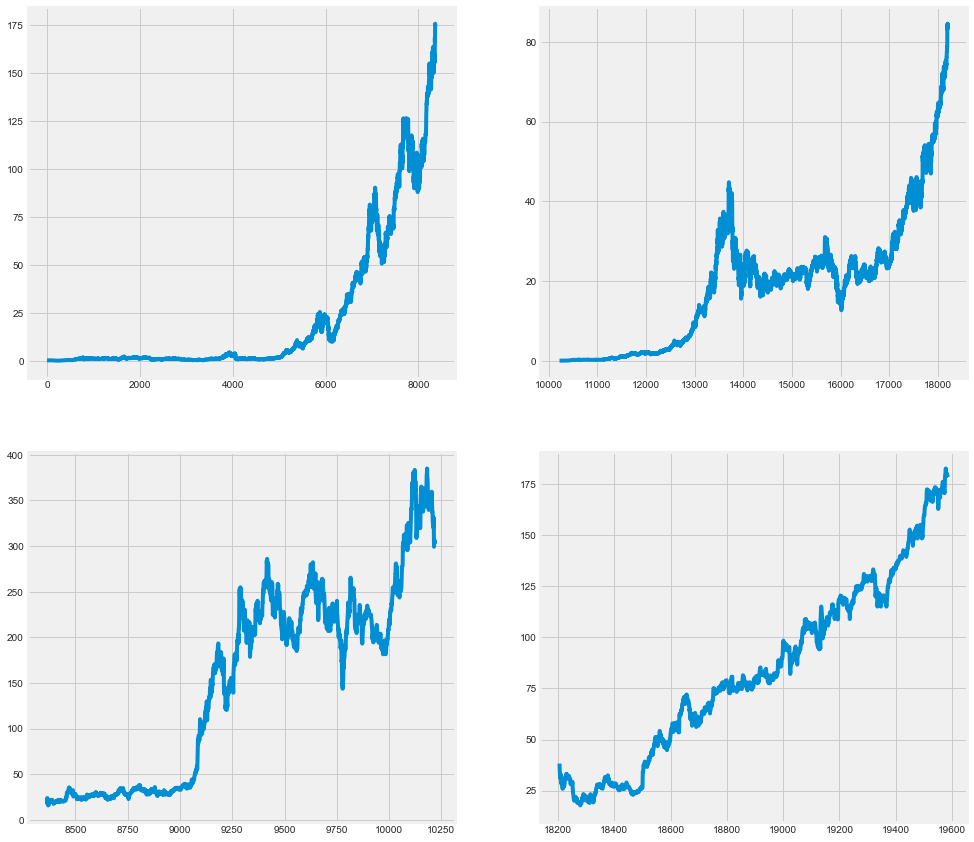

In [82]:
nrow=2
ncol=2
fig, axes = plt.subplots(nrow, ncol,figsize=(15,15))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        companies[count]['CLOSE'].plot(ax=axes[r,c])
        count+=1

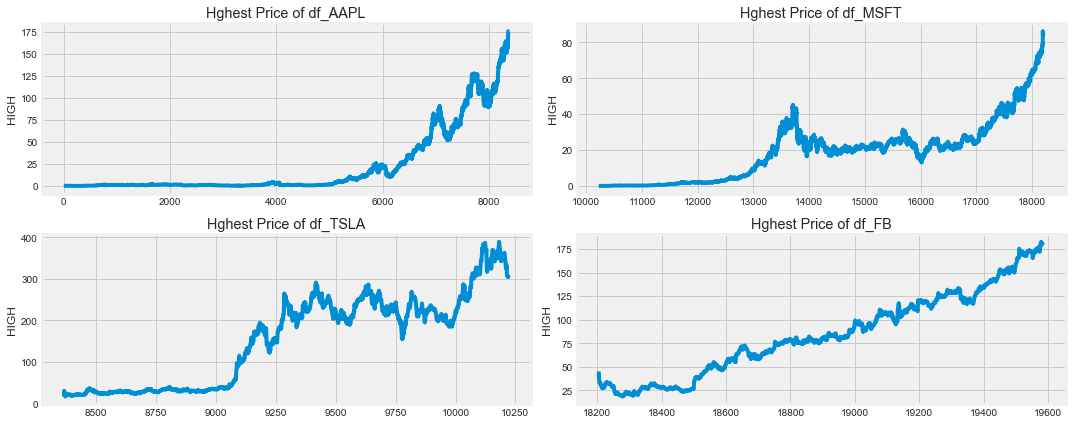

In [83]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['HIGH'].plot()
    plt.ylabel('HIGH')
    plt.xlabel(None)
    plt.title(f"Hghest Price of {company_name[i - 1]}")
    
plt.tight_layout()

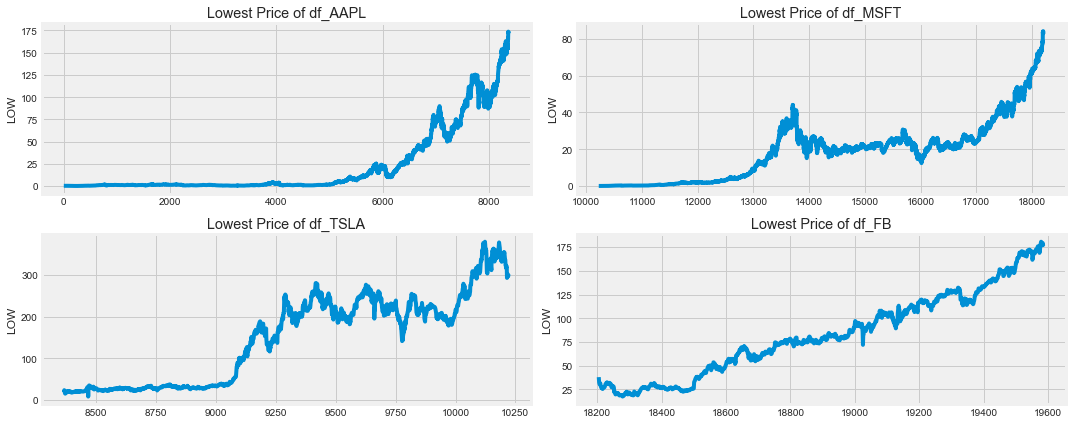

In [84]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['LOW'].plot()
    plt.ylabel('LOW')
    plt.xlabel(None)
    plt.title(f"Lowest Price of {company_name[i - 1]}")
    
plt.tight_layout()

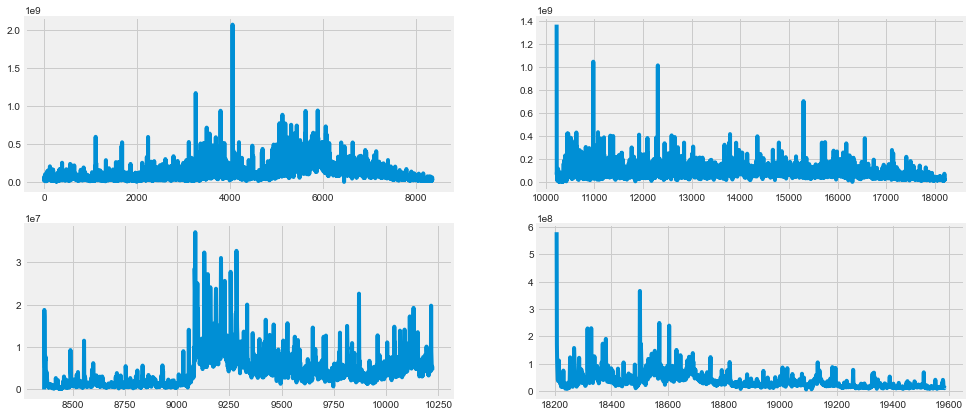

In [85]:
nrow=2
ncol=2
fig, axes = plt.subplots(nrow, ncol,figsize=(15,7))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        companies[count]['VOLUME'].plot(ax=axes[r,c])
        count+=1

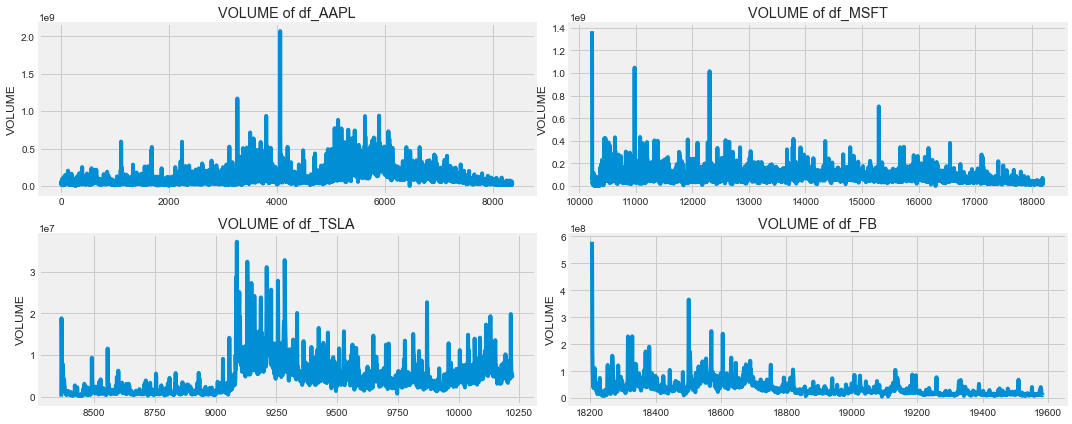

In [86]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['VOLUME'].plot()
    plt.ylabel('VOLUME')
    plt.xlabel(None)
    plt.title(f"VOLUME of {company_name[i - 1]}")
    
plt.tight_layout()

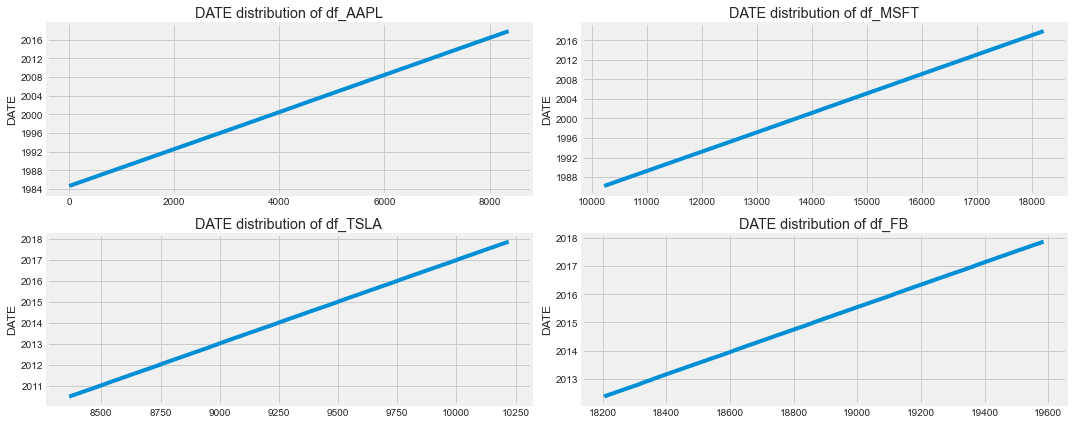

In [87]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['DATE'].plot()
    plt.ylabel('DATE')
    plt.xlabel(None)
    plt.title(f"DATE distribution of {company_name[i - 1]}")
    
plt.tight_layout()

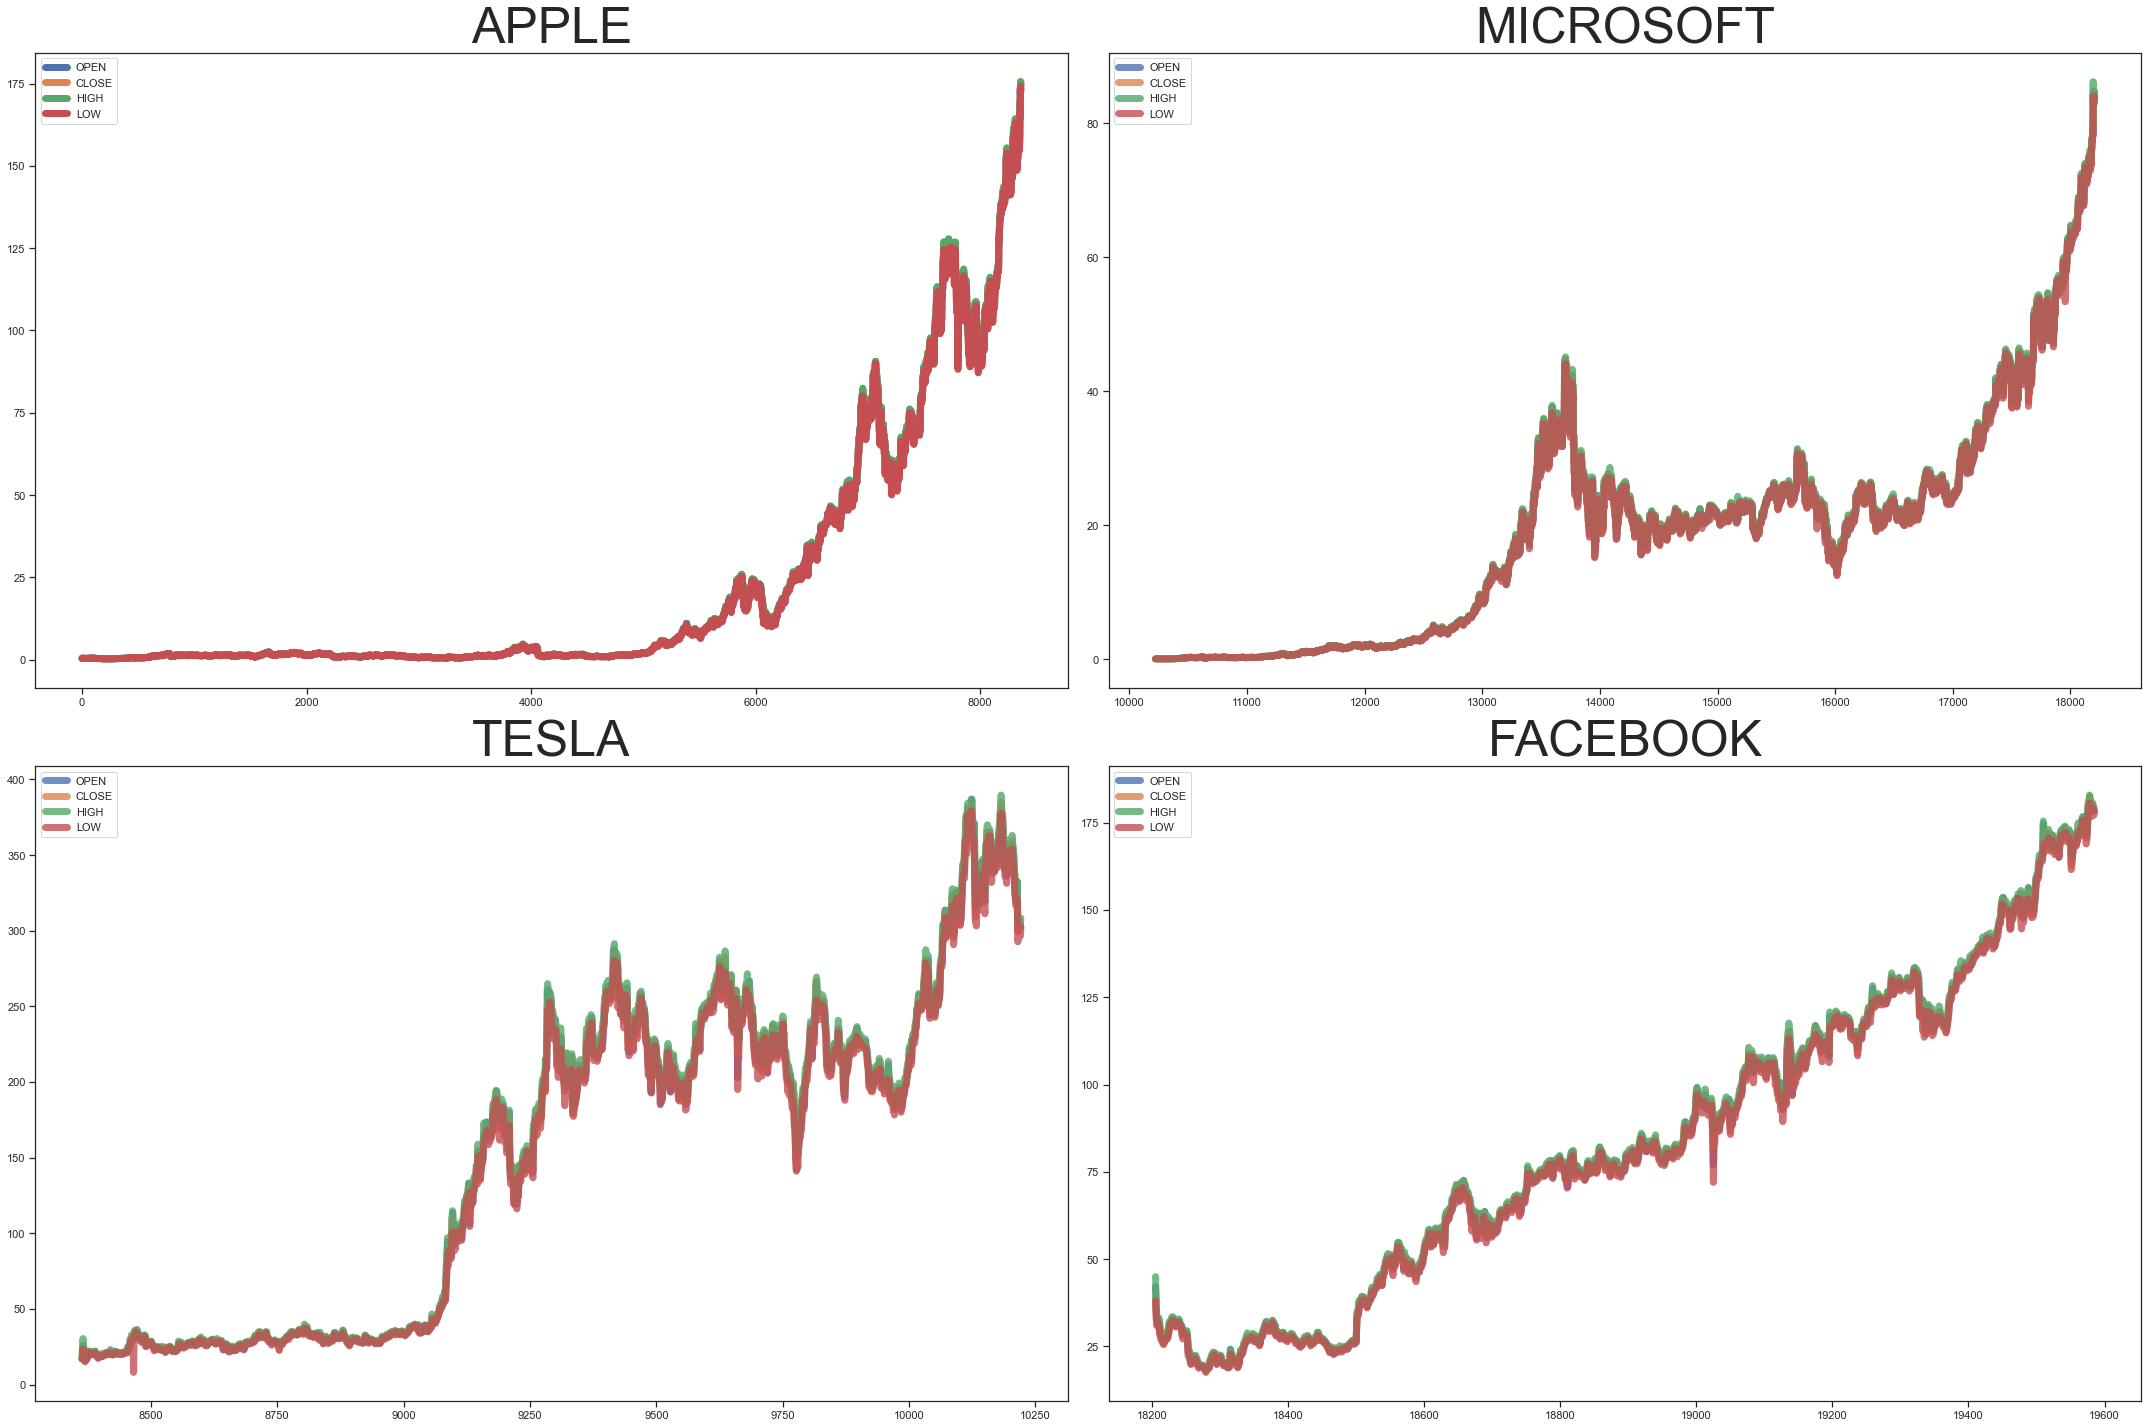

In [88]:
sns.set(style="ticks", rc={"lines.linewidth": 7})
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)


df_AAPL[['OPEN','CLOSE','HIGH','LOW']].plot(ax=axes[0,0],alpha=1)
axes[0,0].set_title('APPLE', fontsize=50)


df_MSFT[['OPEN','CLOSE','HIGH','LOW']].plot(ax=axes[0,1],alpha=0.8)
axes[0,1].set_title('MICROSOFT', fontsize=50)


df_TSLA[['OPEN','CLOSE','HIGH','LOW']].plot(ax=axes[1,0],alpha=0.8)
axes[1,0].set_title('TESLA', fontsize=50)


df_FB[['OPEN','CLOSE','HIGH','LOW']].plot(ax=axes[1,1],alpha=0.8)
axes[1,1].set_title('FACEBOOK', fontsize=50)



fig.tight_layout()


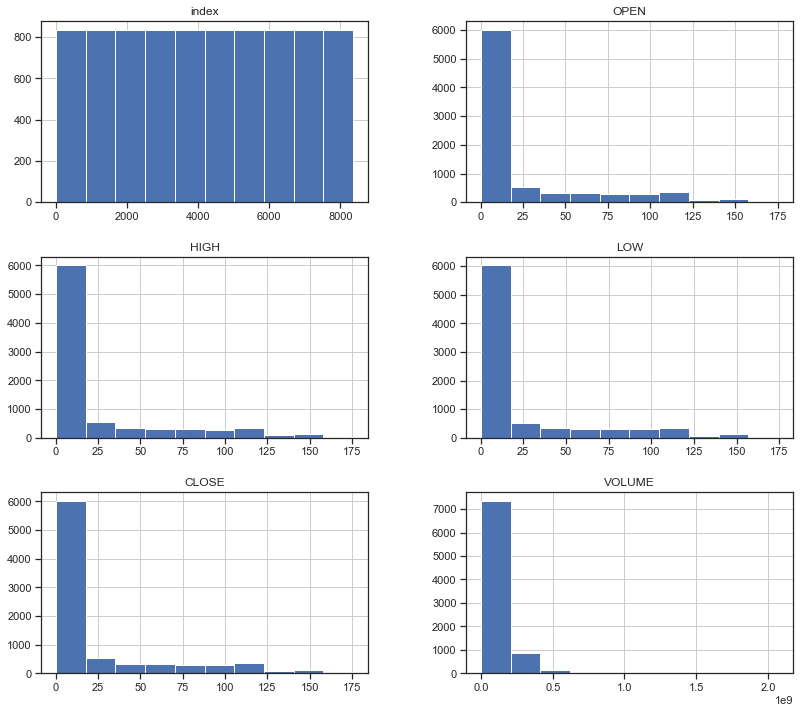

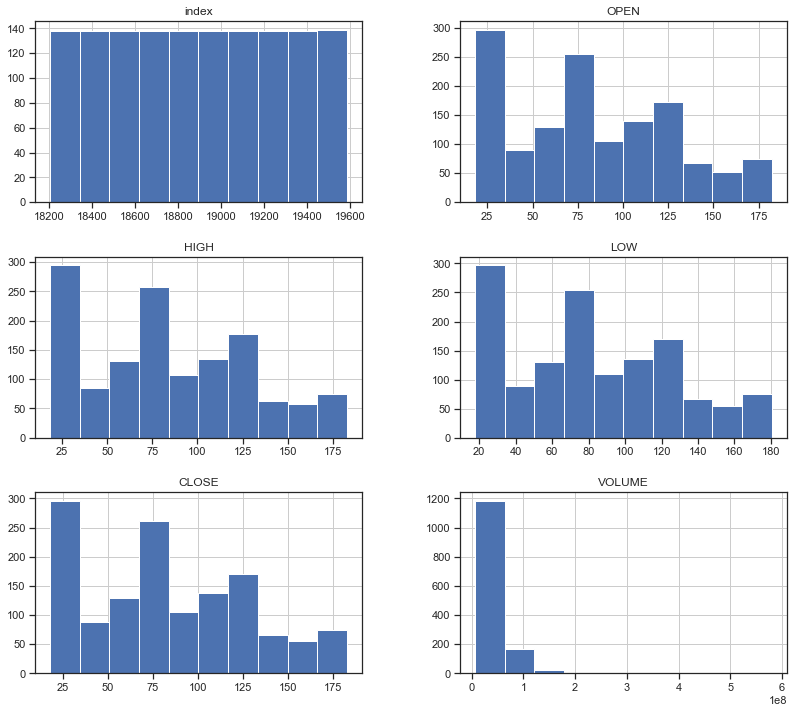

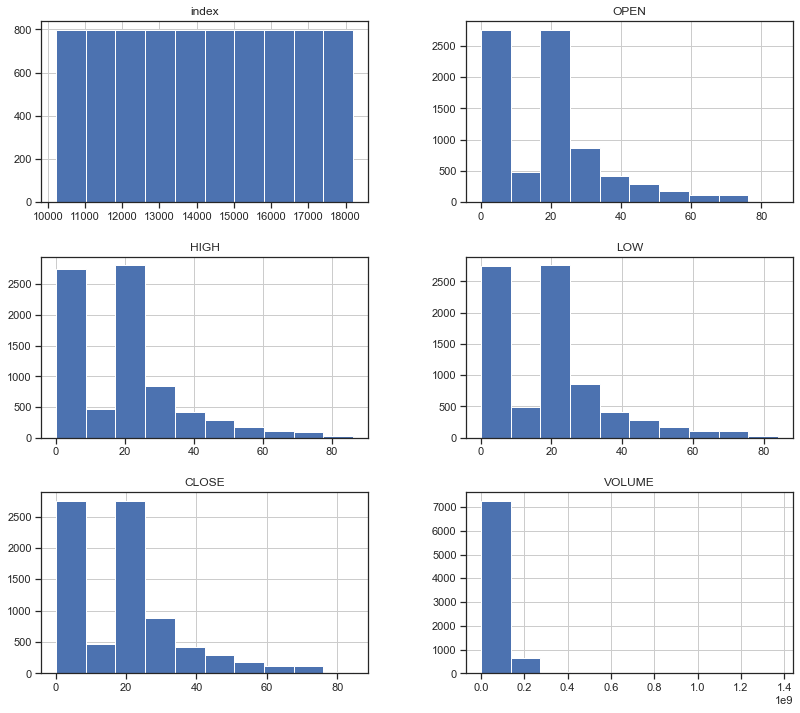

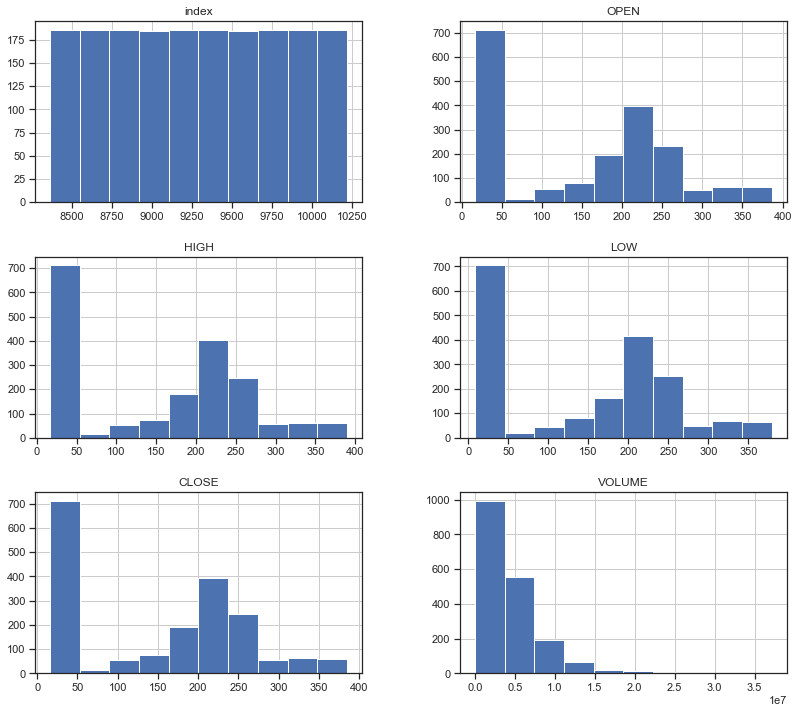

In [89]:
data.groupby("STOCK").hist(figsize=(12, 12));

In [90]:
cp_AAPL=pd.DataFrame(df_AAPL['CLOSE']) 
cp_AAPL.rename(columns={'CLOSE':'CP_AAPL'},inplace=True)
cp_MSFT=pd.DataFrame(df_MSFT['CLOSE']) 
cp_MSFT.rename(columns={'CLOSE':'CP_MSFT'},inplace=True)
cp_TSLA=pd.DataFrame(df_TSLA['CLOSE']) 
cp_TSLA.rename(columns={'CLOSE':'CP_TSLA'},inplace=True)
cp_FB=pd.DataFrame(df_FB['CLOSE']) 
cp_FB.rename(columns={'CLOSE':'CP_FB'},inplace=True)

In [91]:
closing_df= pd.concat([cp_AAPL,cp_MSFT,cp_TSLA,cp_FB], axis=1)

In [92]:
closing_df.head()

CP_AAPL  CP_MSFT  CP_TSLA  CP_FB
0  0.42388      NaN      NaN    NaN
1  0.42134      NaN      NaN    NaN
2  0.42902      NaN      NaN    NaN
3  0.41618      NaN      NaN    NaN
4  0.43927      NaN      NaN    NaN

<AxesSubplot:>

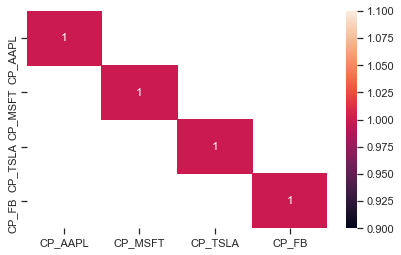

In [93]:
sns.heatmap(closing_df.corr(), annot=True)

In [94]:
df_AAPL=df_AAPL.set_index(df_AAPL['DATE'])
df_AAPL.head()

index       DATE     OPEN     HIGH      LOW    CLOSE    VOLUME  \
DATE                                                                         
1984-09-07      0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030   
1984-09-10      1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532   
1984-09-11      2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199   
1984-09-12      3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801   
1984-09-13      4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062   

           STOCK  
DATE              
1984-09-07  AAPL  
1984-09-10  AAPL  
1984-09-11  AAPL  
1984-09-12  AAPL  
1984-09-13  AAPL

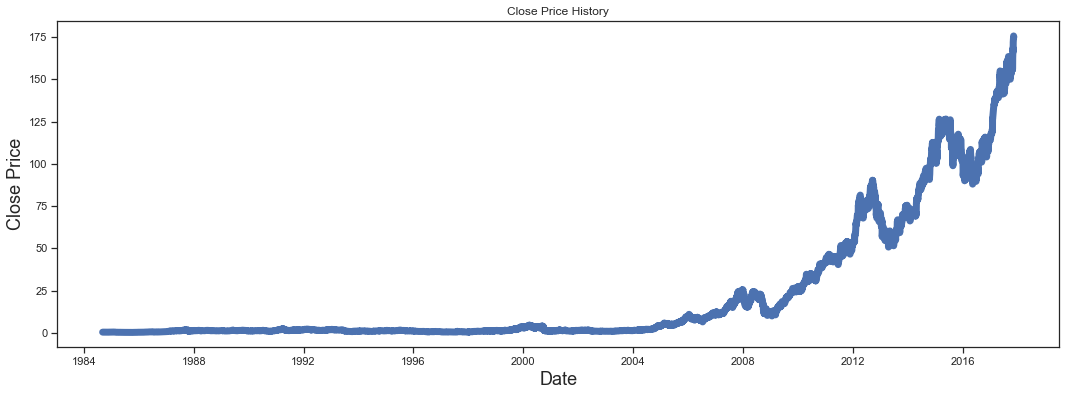

In [95]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_AAPL['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [96]:
# Create a new dataframe with only the 'Close column 
data = df_AAPL.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

7946

In [97]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00110258],
       [0.0010881 ],
       [0.00113189],
       ...,
       [1.        ],
       [0.99794731],
       [0.99464019]])

In [98]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00110258, 0.0010881 , 0.00113189, 0.00105868, 0.00119033,
       0.00122677, 0.00129245, 0.00119746, 0.00114643, 0.00115378,
       0.00113189, 0.00110988, 0.00105868, 0.00102977, 0.00102977,
       0.00097104, 0.00092   , 0.00093466, 0.00097104, 0.00100023,
       0.00094926, 0.00094926, 0.00092742, 0.00086173, 0.00084702,
       0.00075208, 0.00086886, 0.00086173, 0.00094926, 0.00101506,
       0.00101506, 0.00100023, 0.00105143, 0.00107327, 0.00098575,
       0.00092742, 0.00093466, 0.00096391, 0.00094926, 0.00096391,
       0.00094926, 0.00093466, 0.00107327, 0.00102977, 0.00093466,
       0.00080323, 0.00087627, 0.00082512, 0.00084702, 0.00084702,
       0.00080323, 0.00067916, 0.00074473, 0.00078869, 0.00084702,
       0.00086886, 0.00092742, 0.00104431, 0.00100023, 0.00093466])]
[0.0009055220767263037]

[array([0.00110258, 0.0010881 , 0.00113189, 0.00105868, 0.00119033,
       0.00122677, 0.00129245, 0.00119746, 0.00114643, 0.00115378,
       0.00113189, 0.00110988, 0.

In [128]:
df_TSLA

index       DATE    OPEN    HIGH     LOW   CLOSE    VOLUME STOCK
8364    8364 2010-06-28   17.00   17.00   17.00   17.00         0  TSLA
8365    8365 2010-06-29   19.00   25.00   17.54   23.89  18783276  TSLA
8366    8366 2010-06-30   25.79   30.42   23.30   23.83  17194394  TSLA
8367    8367 2010-07-01   25.00   25.92   20.27   21.96   8229863  TSLA
8368    8368 2010-07-02   23.00   23.10   18.71   19.20   5141807  TSLA
...      ...        ...     ...     ...     ...     ...       ...   ...
10217  10217 2017-11-06  307.00  307.50  299.01  302.78   6482486  TSLA
10218  10218 2017-11-07  301.02  306.50  300.03  306.05   5286320  TSLA
10219  10219 2017-11-08  305.50  306.89  301.30  304.31   4725510  TSLA
10220  10220 2017-11-09  302.50  304.46  296.30  302.99   5440335  TSLA
10221  10221 2017-11-10  302.50  308.36  301.85  302.99   4621912  TSLA

[1858 rows x 8 columns]

In [147]:
df_AAPL=df_AAPL.set_index(df_AAPL['DATE'])
df_MSFT=df_MSFT.set_index(df_MSFT['DATE'])
df_TSLA=df_TSLA.set_index(df_TSLA['DATE'])
df_FB=df_FB.set_index(df_FB['DATE'])

In [149]:
closed_AAPL=df_AAPL.filter(['CLOSE'])
closed_AAPL.columns=['AAPL_CLOSE']
closed_MSFT=df_MSFT.filter(['CLOSE'])
closed_MSFT.columns=['MSFT_CLOSE']
closed_TSLA=df_TSLA.filter(['CLOSE'])
closed_TSLA.columns=['TSLA_CLOSE']
closed_FB=df_FB.filter(['CLOSE'])
closed_FB.columns=['FB_CLOSE']

In [156]:
closed_AAPL

AAPL_CLOSE
DATE                  
2012-05-18       38.23
2012-05-21       34.03
2012-05-22       31.00
2012-05-23       32.00
2012-05-24       33.03
...                ...
2017-11-06      180.17
2017-11-07      180.25
2017-11-08      179.56
2017-11-09      179.30
2017-11-10      178.46

[1381 rows x 1 columns]

In [157]:
closed_TSLA

TSLA_CLOSE
DATE                  
2010-06-28       17.00
2010-06-29       23.89
2010-06-30       23.83
2010-07-01       21.96
2010-07-02       19.20
...                ...
2017-11-06      302.78
2017-11-07      306.05
2017-11-08      304.31
2017-11-09      302.99
2017-11-10      302.99

[1858 rows x 1 columns]

In [158]:
closed_MSFT

MSFT_CLOSE
DATE                  
1986-03-13     0.07533
1986-03-14     0.07533
1986-03-17     0.07533
1986-03-18     0.07533
1986-03-19     0.07533
...                ...
2017-11-06    84.47000
2017-11-07    84.26000
2017-11-08    84.56000
2017-11-09    84.09000
2017-11-10    83.87000

[7983 rows x 1 columns]

In [159]:
closed_FB

FB_CLOSE
DATE                
2012-05-18     38.23
2012-05-21     34.03
2012-05-22     31.00
2012-05-23     32.00
2012-05-24     33.03
...              ...
2017-11-06    180.17
2017-11-07    180.25
2017-11-08    179.56
2017-11-09    179.30
2017-11-10    178.46

[1381 rows x 1 columns]

In [180]:
new1=closed_AAPL.merge(closed_MSFT, left_on='DATE', right_on='DATE', how='inner')

In [181]:
new2=closed_TSLA.merge(closed_FB, left_on='DATE', right_on='DATE', how='inner')

In [182]:
new_df=new1.merge(new2,left_on='DATE', right_on='DATE', how='inner')

In [184]:
new_df

AAPL_CLOSE  MSFT_CLOSE  TSLA_CLOSE  FB_CLOSE
DATE                                                    
2012-05-18       38.23      25.379       27.56     38.23
2012-05-21       34.03      25.795       28.77     34.03
2012-05-22       31.00      25.804       30.79     31.00
2012-05-23       32.00      25.242       31.02     32.00
2012-05-24       33.03      25.206       30.32     33.03
...                ...         ...         ...       ...
2017-11-06      180.17      84.470      302.78    180.17
2017-11-07      180.25      84.260      306.05    180.25
2017-11-08      179.56      84.560      304.31    179.56
2017-11-09      179.30      84.090      302.99    179.30
2017-11-10      178.46      83.870      302.99    178.46

[1381 rows x 4 columns]

In [185]:
dataset=new_df.values

In [186]:
dataset

array([[ 38.23 ,  25.379,  27.56 ,  38.23 ],
       [ 34.03 ,  25.795,  28.77 ,  34.03 ],
       [ 31.   ,  25.804,  30.79 ,  31.   ],
       ...,
       [179.56 ,  84.56 , 304.31 , 179.56 ],
       [179.3  ,  84.09 , 302.99 , 179.3  ],
       [178.46 ,  83.87 , 302.99 , 178.46 ]])

In [193]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.12429516, 0.03541741, 0.00406799, 0.12429516],
       [0.09882981, 0.04219774, 0.0074394 , 0.09882981],
       [0.08045838, 0.04234443, 0.01306771, 0.08045838],
       ...,
       [0.98120415, 1.        , 0.77517414, 0.98120415],
       [0.97962772, 0.99233954, 0.77149624, 0.97962772],
       [0.97453465, 0.98875379, 0.77149624, 0.97453465]])

#  MODEL BUILDING

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,[2] speech recognition[3][4] and anomaly detection in network traffic or IDSs (intrusion detection systems).

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.
SOURCE:Wikipedia

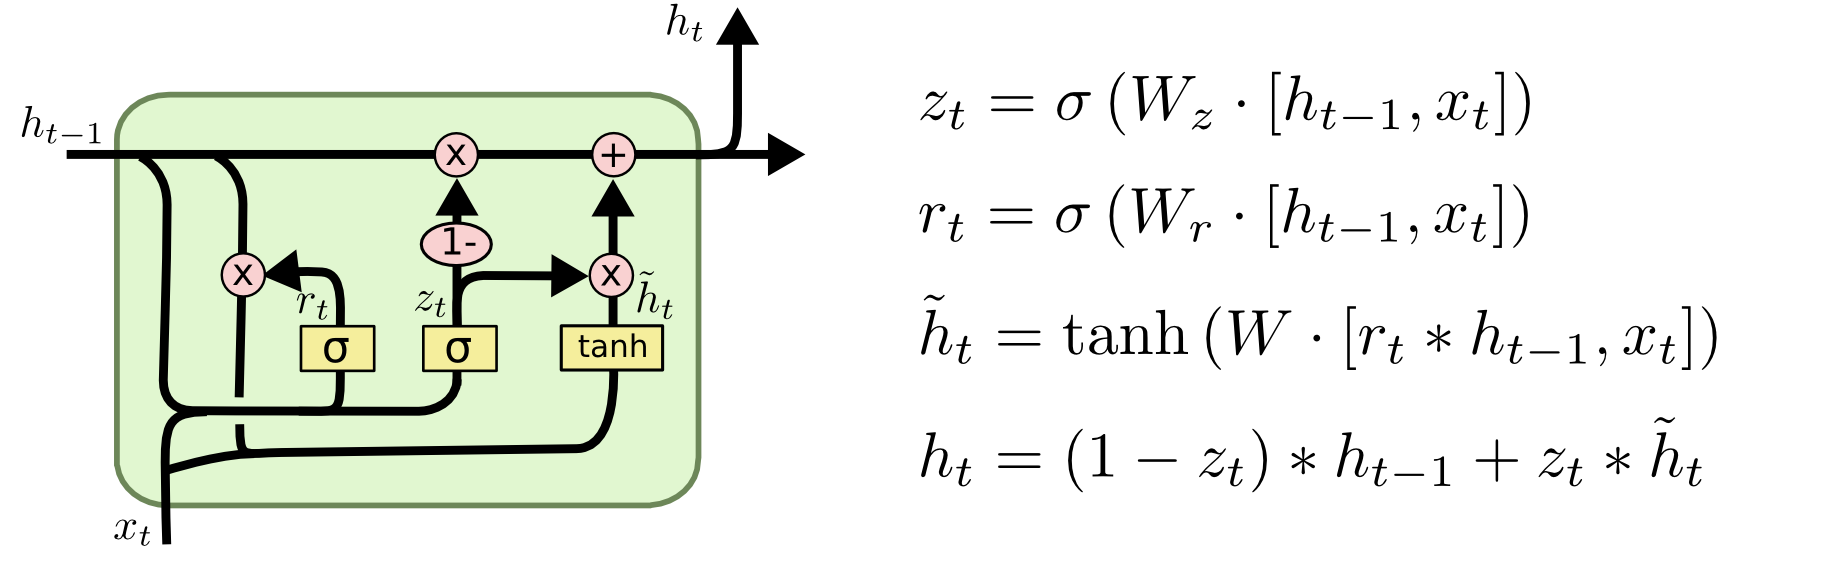

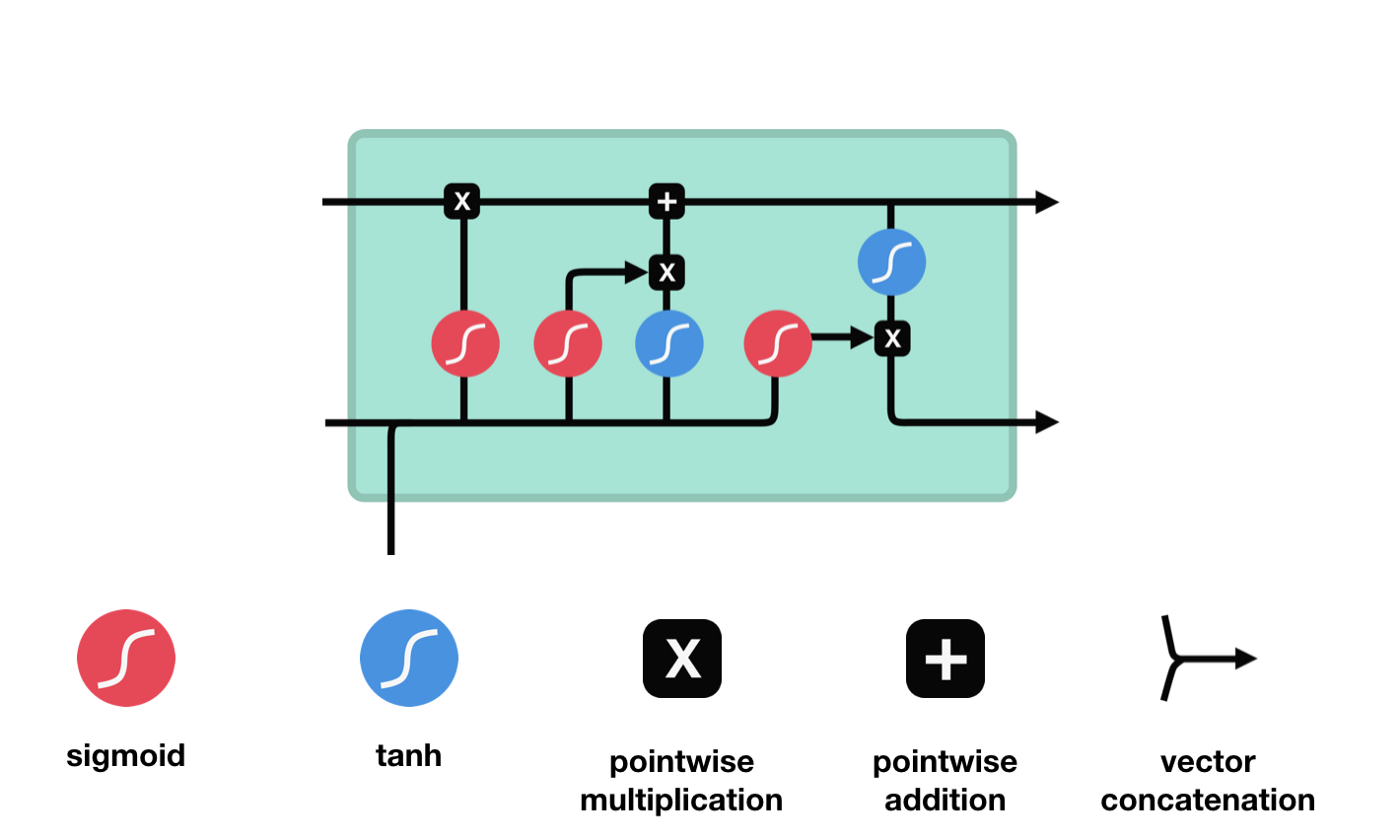

# PRICE PREDICTION FOR APPLE

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

7886/7886 [==============================] - 192s 22ms/step - loss: 8.2549e-04


In [100]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.1562611284705553

<ipython-input-101-41513d609c3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


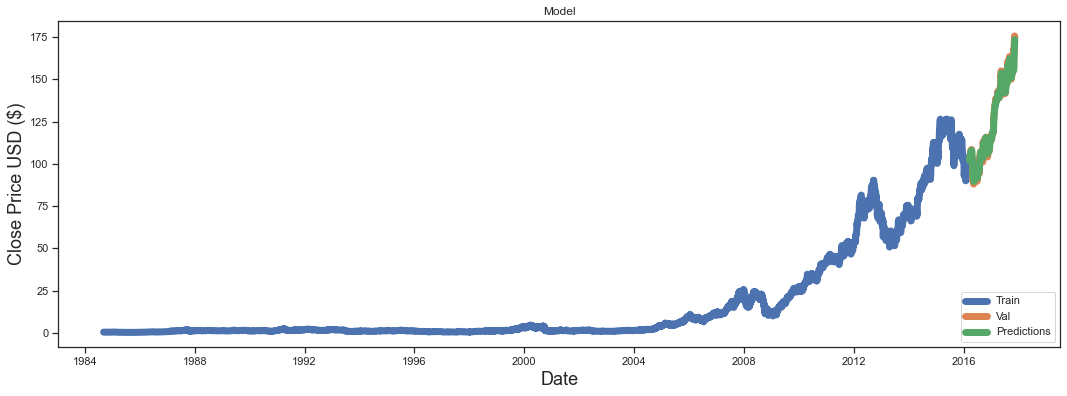

In [101]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [102]:
valid

CLOSE  Predictions
DATE                           
2016-03-18  102.53   102.025696
2016-03-21  102.52   102.643341
2016-03-22  103.30   102.946594
2016-03-23  102.73   103.264481
2016-03-24  102.28   103.320686
...            ...          ...
2017-11-06  173.63   167.912277
2017-11-07  174.18   169.791992
2017-11-08  175.61   171.326797
2017-11-09  175.25   172.691971
2017-11-10  174.67   173.454147

[418 rows x 2 columns]

# PRICE PREDICTION FOR MICROSOFT

In [103]:
df_MSFT=df_MSFT.set_index(df_MSFT['DATE'])
df_MSFT.head()

index       DATE     OPEN     HIGH      LOW    CLOSE      VOLUME  \
DATE                                                                           
1986-03-13  10222 1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506   
1986-03-14  10223 1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463   
1986-03-17  10224 1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245   
1986-03-18  10225 1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008   
1986-03-19  10226 1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515   

           STOCK  
DATE              
1986-03-13  MSFT  
1986-03-14  MSFT  
1986-03-17  MSFT  
1986-03-18  MSFT  
1986-03-19  MSFT

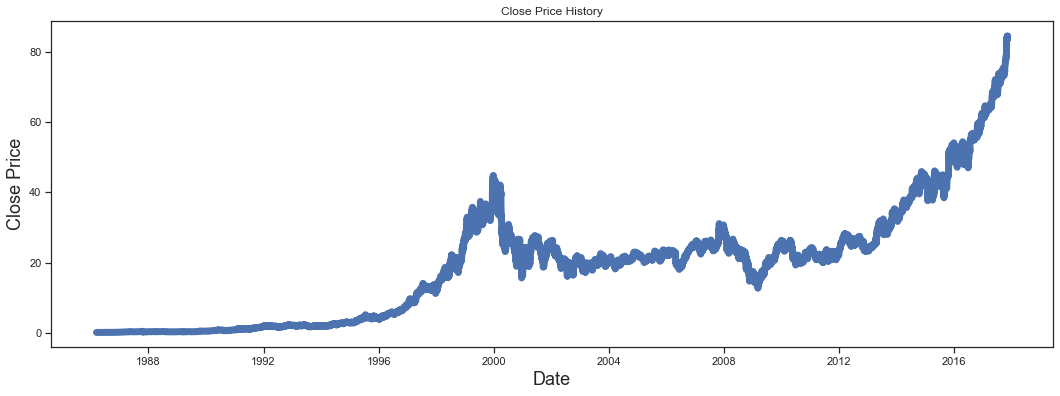

In [104]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_MSFT['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [105]:
# Create a new dataframe with only the 'Close column 
data = df_MSFT.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

7584

In [106]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.62212165e-05],
       [9.62212165e-05],
       [9.62212165e-05],
       ...,
       [1.00000000e+00],
       [9.94437396e-01],
       [9.91833624e-01]])

In [107]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.62212165e-05, 9.62212165e-05,
       0.00000000e+00, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       0.00000000e+00, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 1.97531624e-04, 2.96119906e-04, 2.96119906e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 2.96119906e-04, 2.96119906e-04, 2.96119906e-04,
     

In [108]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

7524/7524 [==============================] - 165s 21ms/step - loss: 4.4353e-04


In [109]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.2338525173993813

In [110]:
valid

CLOSE  Predictions
DATE                           
2016-03-18  102.53   102.025696
2016-03-21  102.52   102.643341
2016-03-22  103.30   102.946594
2016-03-23  102.73   103.264481
2016-03-24  102.28   103.320686
...            ...          ...
2017-11-06  173.63   167.912277
2017-11-07  174.18   169.791992
2017-11-08  175.61   171.326797
2017-11-09  175.25   172.691971
2017-11-10  174.67   173.454147

[418 rows x 2 columns]

# PRICE PREDICTION FOR TESLA

In [111]:
df_TSLA=df_TSLA.set_index(df_TSLA['DATE'])
df_TSLA.head()

index       DATE   OPEN   HIGH    LOW  CLOSE    VOLUME STOCK
DATE                                                                    
2010-06-28   8364 2010-06-28  17.00  17.00  17.00  17.00         0  TSLA
2010-06-29   8365 2010-06-29  19.00  25.00  17.54  23.89  18783276  TSLA
2010-06-30   8366 2010-06-30  25.79  30.42  23.30  23.83  17194394  TSLA
2010-07-01   8367 2010-07-01  25.00  25.92  20.27  21.96   8229863  TSLA
2010-07-02   8368 2010-07-02  23.00  23.10  18.71  19.20   5141807  TSLA

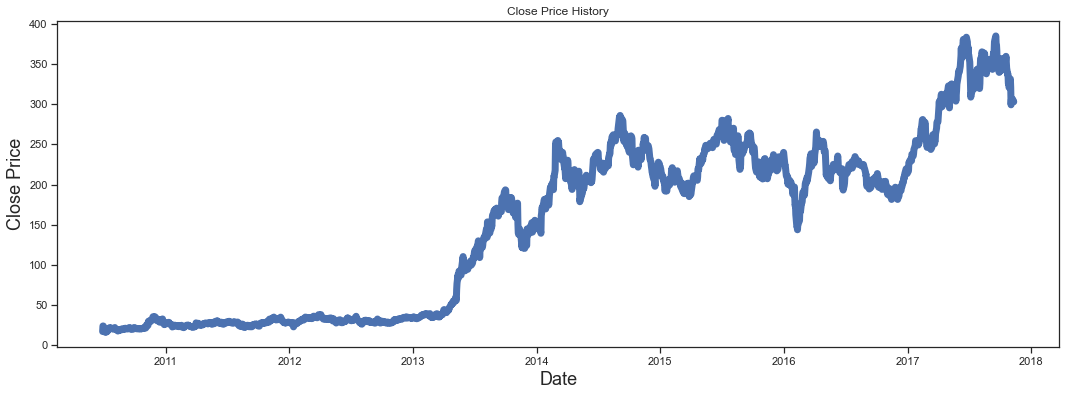

In [112]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_TSLA['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [113]:
# Create a new dataframe with only the 'Close column 
data = df_TSLA.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1766

In [114]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00325027],
       [0.02191224],
       [0.02174973],
       ...,
       [0.78144637],
       [0.77787107],
       [0.77787107]])

In [115]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00325027, 0.02191224, 0.02174973, 0.01668472, 0.0092091 ,
       0.00083965, 0.        , 0.00449621, 0.00433369, 0.0033857 ,
       0.00633803, 0.01094258, 0.01107801, 0.01310943, 0.0165493 ,
       0.01218852, 0.01197183, 0.01408451, 0.01486999, 0.01394908,
       0.01286566, 0.01332611, 0.01232394, 0.01121343, 0.01386782,
       0.01665764, 0.01478873, 0.0125948 , 0.01026544, 0.01029252,
       0.00874865, 0.00568797, 0.00487541, 0.00682557, 0.00807151,
       0.00907367, 0.00804442, 0.00809859, 0.00893824, 0.01172806,
       0.0092091 , 0.01110509, 0.01069881, 0.01056338, 0.01102384,
       0.0099675 , 0.0125948 , 0.01424702, 0.01421993, 0.01283857,
       0.01381365, 0.01329902, 0.0118364 , 0.01332611, 0.01440953,
       0.01673889, 0.01392199, 0.01199892, 0.01421993, 0.01346154])]
[0.011023835319609966]

[array([0.00325027, 0.02191224, 0.02174973, 0.01668472, 0.0092091 ,
       0.00083965, 0.        , 0.00449621, 0.00433369, 0.0033857 ,
       0.00633803, 0.01094258, 0.0

In [116]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1706/1706 [==============================] - 41s 22ms/step - loss: 0.0035


In [117]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15.45629535158899

In [118]:
valid

CLOSE  Predictions
DATE                           
2016-03-18  102.53   102.025696
2016-03-21  102.52   102.643341
2016-03-22  103.30   102.946594
2016-03-23  102.73   103.264481
2016-03-24  102.28   103.320686
...            ...          ...
2017-11-06  173.63   167.912277
2017-11-07  174.18   169.791992
2017-11-08  175.61   171.326797
2017-11-09  175.25   172.691971
2017-11-10  174.67   173.454147

[418 rows x 2 columns]

# PRICE PREDICTION FOR FACEBOOK

In [119]:
df_FB=df_FB.set_index(df_FB['DATE'])
df_FB.head()

index       DATE   OPEN   HIGH    LOW  CLOSE     VOLUME STOCK
DATE                                                                     
2012-05-18  18205 2012-05-18  42.05  45.00  38.00  38.23  580438450    FB
2012-05-21  18206 2012-05-21  36.53  36.66  33.00  34.03  169418988    FB
2012-05-22  18207 2012-05-22  32.61  33.59  30.94  31.00  101876406    FB
2012-05-23  18208 2012-05-23  31.37  32.50  31.36  32.00   73678512    FB
2012-05-24  18209 2012-05-24  32.95  33.21  31.77  33.03   42560731    FB

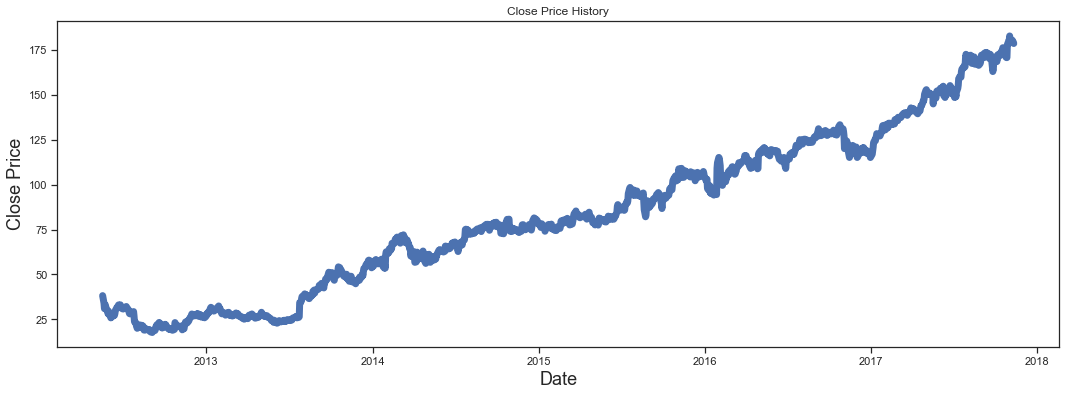

In [120]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_FB['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [121]:
# Create a new dataframe with only the 'Close column 
data = df_FB.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1312

In [122]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.12429516],
       [0.09882981],
       [0.08045838],
       ...,
       [0.98120415],
       [0.97962772],
       [0.97453465]])

In [123]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.12429516, 0.09882981, 0.08045838, 0.08652155, 0.09276663,
       0.08597587, 0.06736191, 0.06342085, 0.07196993, 0.06057115,
       0.05559935, 0.04935427, 0.05505366, 0.05202207, 0.05681198,
       0.05620566, 0.05863093, 0.05784272, 0.06402716, 0.07445583,
       0.08294428, 0.08597587, 0.08409628, 0.08555145, 0.09288789,
       0.08688535, 0.09319105, 0.08791609, 0.08264112, 0.08100406,
       0.07906385, 0.08167101, 0.08330807, 0.0848845 , 0.08755229,
       0.08330807, 0.08027648, 0.07930637, 0.07876069, 0.06378464,
       0.06281453, 0.06899897, 0.06833202, 0.06687686, 0.06681623,
       0.06499727, 0.0703935 , 0.05523555, 0.03619717, 0.03286243,
       0.02413145, 0.01909901, 0.01400594, 0.02037228, 0.02540472,
       0.0181289 , 0.0181289 , 0.01988722, 0.02473777, 0.0234645 ])]
[0.016067422542896975]

[array([0.12429516, 0.09882981, 0.08045838, 0.08652155, 0.09276663,
       0.08597587, 0.06736191, 0.06342085, 0.07196993, 0.06057115,
       0.05559935, 0.04935427, 0.0

In [124]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1252/1252 [==============================] - 30s 21ms/step - loss: 0.0064


In [125]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.103256366291259

In [128]:
valid

CLOSE  Predictions
DATE                           
2016-03-18  102.53   102.025696
2016-03-21  102.52   102.643341
2016-03-22  103.30   102.946594
2016-03-23  102.73   103.264481
2016-03-24  102.28   103.320686
...            ...          ...
2017-11-06  173.63   167.912277
2017-11-07  174.18   169.791992
2017-11-08  175.61   171.326797
2017-11-09  175.25   172.691971
2017-11-10  174.67   173.454147

[418 rows x 2 columns]

# CONCLUSION

In this notebook we have looked at data from the stock market with respect to different companies, particularly some technology stocks. We have used pandas to get stock information,we have used libraries like matplotlib and seaborn to visualize different aspects of it, and finally we have performed feature scaling and based on its previous performance history we have built a model to predict future stock prices through a Long Short Term Memory (LSTM) method.